In [1]:
# Module
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# K-Means(2D) - 각 군집을 계층적으로 여러번 군집화 시키기
참고 : https://medium.com/@nsh235482/k-means-clustering-6ab85a2a32ad

### API 데이터 정리
>#### acousticness 
>> 트랙의 음향에서 어쿠스틱 요소 여부에 대해 0.0에서 1.0까지의 특성을 측정. 1.0은 트랙이 어쿠스틱적이라는 측정.     

> #### danceability  
>> 곡이 가지는 템포, 리듬의 안정성, 박자 강도 및 전반적인 규칙성을 포함한 음악 요소의 조합에 따라 춤에 적합한 트랙을 설명합니다.    
0.0 부터 1.0까지의 값이 존재하고, 1.0은 가장 무용에 적합합니다.         

>#### duration_ms  : 밀리 초 단위의 트랙 지속 시간.      

>#### energy      
>> 곡이 얼마나 강렬하고 활동적인지를 측정한 값. 0.0에서 1.0까지 값이 존재.     
일반적으로 활기찬 트랙은 빠르고 시끄럽습니다.     
예를 들어, 데스 메탈은 높은 에너지를 가지고있는 반면 바흐 서곡은 낮은 점수를 얻습니다.     
이 속성에 기여하는 지각 특징은 동적 범위,인지 된 소리 크기, 음색, 시작 속도 및 일반 엔트로피를 포함합니다.     
이 기능의 값 분포는 다음과 같습니다.    

>#### instrumentalness   
>> 트랙에 보컬이 없는지 여부를 예측합니다.    
"우"와 "아"소리는 문맥에서 판단도구로 취급됩니다.     
Instrumentalness 값이 1.0에 가까울수록 트랙에 보컬 콘텐츠가 포함되지 않을 확률이 높아집니다.      
0.5 이상의 값은 악기 트랙을 나타 내기위한 것이지만 값이 1.0에 가까워 질수록 보컬트랙이 포함될 가능성이 높습니다.     
  
>#### key     
>> 음악의 전체적인 키를 표시합니다.    
예 : 0 = C, 1 = C # / D ♭, 2 = D 등. 키가 발견되지 않으면 값은 -1입니다.    

>#### liveness      
>> 0.8보다 큰 값은 트랙이 라이브 트랙일 가능성이 큽니다.   

>#### loudness      
>> 트랙의 전체 소리 크기 (데시벨 (dB))입니다.     
음량 값은 전체 트랙에서 평균화되며 트랙의 상대적 음량을 비교하는 데 유용합니다.     
값 범위는 -60에서 0 db 사이입니다.    

>#### mode        

>#### speechiness 
>> Speechiness는 트랙에서 말한 단어의 존재를 감지합니다.    
독점적으로 말하기와 같은 녹음 (예 : 토크쇼, 오디오 북,시)은 1.0에 가까워집니다.    
0.66 이상의 값은 전적으로 음성 단어로 만들어진 트랙을 나타냅니다.   
0.33에서 0.66 사이의 값은 랩 음악과 같은 경우를 포함하여 섹션 또는 계층으로 음악과 음성을 모두 포함 할 수있는 트랙을 나타냅니다.   
0.33 미만의 값은 음악 및 기타 비언어적 트랙을 나타낼 가능성이 가장 높습니다.     
 
>#### tempo 
>> 분당 비트 수 (BPM)로 트랙의 전체 예상 템포.   
음악 용어에서 템포는 주어진 곡의 속도 또는 속도이며 평균 비트 지속 시간에서 직접 파생됩니다.    

>#### time_signature 
>> 박자

>#### valence        
>> 트랙에 의해 전달되는 음악적 양립성을 나타내는 0.0에서 1.0까지의 측정 값입니다.     
높은 원자가를 가진 트랙은 긍정적 (예 : 행복, 쾌활, 행복),    
낮은 원자가의 트랙은 더 부정적 (예 : 슬프고 우울, 분노)합니다.    

In [490]:
# 데이터 불러오기 API data
songs = pd.read_csv('./data/SpotifyAudioFeatures2000_2018.csv')

In [491]:
del songs['Unnamed: 0']
del songs['Unnamed: 0.1']

In [492]:
# 데이터 확인
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169299 entries, 0 to 169298
Data columns (total 20 columns):
artist_name         169299 non-null object
track_name          169299 non-null object
track_id            169299 non-null object
popularity          169299 non-null int64
url                 169299 non-null object
images              169264 non-null object
date                169299 non-null object
acousticness        169299 non-null float64
danceability        169299 non-null float64
duration_ms         169299 non-null int64
energy              169299 non-null float64
instrumentalness    169299 non-null float64
key                 169299 non-null int64
liveness            169299 non-null float64
loudness            169299 non-null float64
mode                169299 non-null int64
speechiness         169299 non-null float64
tempo               169299 non-null float64
time_signature      169299 non-null int64
valence             169299 non-null float64
dtypes: float64(9), int64

In [493]:
# # 데이터 복제
# spotify_song_for_clustering = songs
# spotify_song_for_clustering.head()

In [494]:
# 데이터 정리
# spotify_song_for_clustering = spotify_song_for_clustering[['artist_name', 'track_name', 'track_id', 'url', 'images', 'date', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo','time_signature', 'valence']]

#### 표준화

In [495]:
# 기초 통계량 확인
songs.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,169299.000000,169299.000000,169299.000000,1.692990e+05,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000,169299.000000
mean,40.418750,0.298974,0.562309,2.362045e+05,0.626488,0.124892,5.257645,0.206260,-8.097425,0.668002,0.096151,120.250754,3.892829,0.481786
std,11.893513,0.322394,0.178118,1.100092e+05,0.247669,0.281089,3.558541,0.183229,4.915052,0.470932,0.122897,30.722586,0.442913,0.258444
min,16.000000,0.000000,0.000000,7.229000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.019400,0.447000,1.899470e+05,0.465000,0.000000,2.000000,0.097000,-9.564000,0.000000,0.035000,95.751500,4.000000,0.273000
50%,39.000000,0.157000,0.572000,2.243460e+05,0.664000,0.000019,5.000000,0.129000,-6.796000,1.000000,0.048400,119.455000,4.000000,0.472000
75%,48.000000,0.542000,0.693000,2.649000e+05,0.830000,0.012700,8.000000,0.261000,-5.015000,1.000000,0.096500,140.035000,4.000000,0.687000
max,98.000000,0.996000,0.987000,5.403500e+06,1.000000,1.000000,11.000000,1.000000,2.039000,1.000000,0.965000,232.690000,5.000000,1.000000


In [496]:
# 연속변수로 구성된 컬럼만 선택하여 데이터프레임 만들기
target_col = ['popularity','duration_ms','key','acousticness','danceability','energy','instrumentalness',
              'liveness','loudness','speechiness','time_signature','tempo','valence']
df = songs[target_col]

# 표준화 필요한 컬럼 
# 판단1 : popularity, duration_ms, key, loudness, tempo,time_signature (0에서 1 사이가 아닌 것 모두 표준화)

# 판단1
cols = ['popularity', 'duration_ms', 'key', 'loudness', 'tempo','time_signature']

# 판단1 표준화
data = songs[cols]
standardized_data = MinMaxScaler().fit_transform(data)

# 표준화 칼럼 재생산
df = pd.DataFrame(standardized_data)
df1 = df.rename(columns={0: 'popularity', 1: 'duration_ms', 2: 'key', 3: 'loudness', 4: 'tempo', 5: 'time_signature'})

# 데이터 합치기
cols_2 = ['track_name','artist_name','url','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness',
          'valence']
df2 = songs[cols_2]

# int, float 컬럼 중 표준화 안 해도 되는 컬럼과 표준화한 컬럼 합치기
songs_1 = pd.concat([df2, df1], axis=1)

In [497]:
songs_1.head()

,track_name,artist_name,url,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,popularity,duration_ms,key,loudness,tempo,time_signature
0,In The End,Linkin Park,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,0.01030,0.542,0.853,0.000000,0.1080,0.0498,0.370,0.817073,0.038861,0.272727,0.863860,0.452344,0.8
1,Kryptonite,3 Doors Down,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,0.00664,0.545,0.865,0.000011,0.1680,0.0286,0.543,0.756098,0.042011,1.000000,0.875127,0.425502,0.8
2,The Real Slim Shady,Eminem,https://open.spotify.com/track/3yfqSUWxFvZELEM...,0.03390,0.950,0.665,0.000000,0.0453,0.0610,0.760,0.756098,0.051326,0.454545,0.898048,0.449113,0.8
3,Ms. Jackson,OutKast,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,0.14200,0.843,0.805,0.000000,0.0771,0.2690,0.615,0.743902,0.048789,0.363636,0.871291,0.408036,0.8
4,Yellow,Coldplay,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,0.00239,0.429,0.661,0.000130,0.2340,0.0281,0.285,0.792683,0.048097,1.000000,0.850642,0.745047,0.8


In [498]:
# 키 값은 이미 군집화가 되어 있는 것과 마찬가지
songs_1['key'].unique()

array([0.27272727, 1.        , 0.45454545, 0.36363636, 0.72727273,
       0.63636364, 0.09090909, 0.90909091, 0.        , 0.54545455,
       0.18181818, 0.81818182])

# ----------------------------------------------------------------------------------------------------------

# MBTI 방식 군집화

In [499]:
# 클러스터링 할 칼럼들 정
songs_1.head(2)
# 계층 선택1 - speechiness bpm 에 따라 음악과 음악 아닌것이 나뉠 것!
hierarchy1 = songs_1[['popularity']]
hierarchy2 = songs_1[['loudness']]
hierarchy3 = songs_1[['tempo']]
hierarchy4 = songs_1[['time_signature']]
hierarchy5 = songs_1[['acousticness']]
hierarchy6 = songs_1[['danceability']]
hierarchy7 = songs_1[['energy']]
hierarchy8 = songs_1[['instrumentalness']]
hierarchy9 = songs_1[['liveness']]
hierarchy10 = songs_1[['speechiness']]
hierarchy11 = songs_1[['valence']]
hierarchy12 = songs_1[['key']]

## >>>>>1 popularity
곡의 인기도

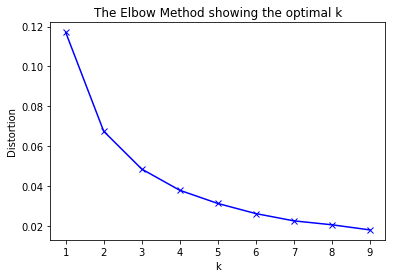

In [ ]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy1)
    kmeanModel.fit(hierarchy1)
    distortions.append(sum(np.min(cdist(hierarchy1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy1.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy1)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy1, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""
--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.5751837615730765
For n_clusters=3, The Silhouette Coefficient is 0.5509968511379394
For n_clusters=4, The Silhouette Coefficient is 0.5307107138999458
For n_clusters=5, The Silhouette Coefficient is 0.5326249445947965
For n_clusters=6, The Silhouette Coefficient is 0.5364719576280557
For n_clusters=7, The Silhouette Coefficient is 0.5441572605307432
For n_clusters=8, The Silhouette Coefficient is 0.5336959965189784
For n_clusters=9, The Silhouette Coefficient is 0.5391537426346139
For n_clusters=10, The Silhouette Coefficient is 0.5385611421080735
""")

Text(0.5, 1.0, '2D K-means Result')

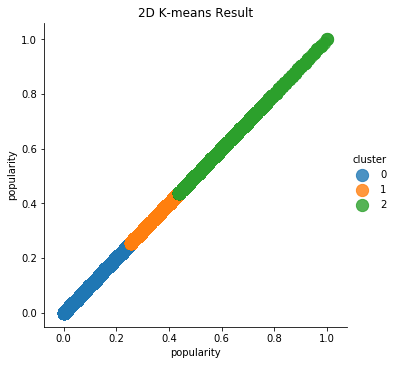

In [500]:
hierarchy1 = songs_1[['popularity']]

# Fit the model.
model = KMeans(n_clusters=3,random_state=12).fit(hierarchy1)

# Get results.
hierarchy1['cluster'] = model.predict(hierarchy1)

# 결과값 살펴보기
hierarchy1['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('popularity','popularity',data = hierarchy1, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

In [82]:
# # # 나타난 특성에 따라서 실제 곡들 살펴보기
hierarchy1=pd.concat([songs[['track_name','artist_name','url']], hierarchy1], axis=1)
hierarchy1df = pd.DataFrame(hierarchy1)

In [93]:
print(len(hierarchy1df.loc[(hierarchy1df['cluster']==0), :]))
print(len(hierarchy1df.loc[(hierarchy1df['cluster']==1), :]))
print(len(hierarchy1df.loc[(hierarchy1df['cluster']==2), :]))
hierarchy1df2 = hierarchy1df.loc[(hierarchy1df['cluster']==2)&(hierarchy1df['popularity']>0.9), :]
hierarchy1df2.head()

71470
67127
30702


,track_name,artist_name,url,popularity,cluster
162440,Wow.,Post Malone,https://open.spotify.com/track/6MWtB6iiXyIwun0...,1.000000,2
162441,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,https://open.spotify.com/track/3KkXRkHbMCARz0a...,1.000000,2
162443,Going Bad (feat. Drake),Meek Mill,https://open.spotify.com/track/2IRZnDFmlqMuOrY...,0.951220,2
162444,SICKO MODE,Travis Scott,https://open.spotify.com/track/2xLMifQCjDGFmkH...,0.951220,2
162445,Without Me,Halsey,https://open.spotify.com/track/5p7ujcrUXASCNwR...,0.987805,2


In [94]:
for i in hierarchy1df2['url']:
    print(i)

https://open.spotify.com/track/6MWtB6iiXyIwun0YzU6DFP
https://open.spotify.com/track/3KkXRkHbMCARz0aVfEt68P
https://open.spotify.com/track/2IRZnDFmlqMuOrYOLnZZyc
https://open.spotify.com/track/2xLMifQCjDGFmkHkpNLD9h
https://open.spotify.com/track/5p7ujcrUXASCNwRaWNHR1C
https://open.spotify.com/track/2t8yVaLvJ0RenpXUIAC52d
https://open.spotify.com/track/78QR3Wp35dqAhFEc2qAGjE
https://open.spotify.com/track/3oh6SCCeLuXhFpEyepla6G
https://open.spotify.com/track/1xzBco0xcoJEDXktl7Jxrr
https://open.spotify.com/track/0FZ4Dmg8jJJAPJnvBIzD9z
https://open.spotify.com/track/2dpaYNEQHiRxtZbfNsse99
https://open.spotify.com/track/2rPE9A1vEgShuZxxzR2tZH
https://open.spotify.com/track/14mHfNsSHN0FbLftyjrV9g
https://open.spotify.com/track/285pBltuF7vW8TeWk8hdRR
https://open.spotify.com/track/3ee8Jmje8o58CHK66QrVC2
https://open.spotify.com/track/7dt6x5M1jzdTEt8oCbisTK
https://open.spotify.com/track/3Ol2xnObFdKV9pmRD2t9x8
https://open.spotify.com/track/1rqqCSm0Qe4I9rUvWncaom
https://open.spotify.com/tra

## 해석 
popularity는 0 1 2 의 세가지 군집이 형성되었다.      
각 군집은     
0 : 71470    
1 : 67127    
2 : 30702   
로 군집화 되어있고 0 에서 1로 진행될 수록 인기가 있는 곳이 분포해 있습니다.     
또한 이 기준은 미국의 빌보드 기준으로 형성된 것으로 보입니다.    
popularity가 0.9 이상인 곡들을 살펴보았을 때 대부분이 최근에 빌보드에 속해 있는 곡들과 아티스트들이 분포해 있는 것을    
알 수 있습니다.     

따라서 우리는 0 1 2 의 값을 인기도 낮음 : 보통 : 높음     
으로 해석하여 군집을 해석할 것입니다.    


In [501]:
# 데이터 삽입
songs['clst_popularity'] = hierarchy1['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,clst_popularity
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,2
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,0.000011,11,0.1680,-5.708,0,0.0286,99.010,4,0.543,2
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,0.000000,5,0.0453,-4.286,0,0.0610,104.504,4,0.760,2
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,0.000000,4,0.0771,-5.946,0,0.2690,94.946,4,0.615,2
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,0.000130,11,0.2340,-7.227,1,0.0281,173.365,4,0.285,2


## >>>>> 2 loudness
트랙의 전체 소리 크기 (데시벨 (dB))입니다.     
음량 값은 전체 트랙에서 평균화되며 트랙의 상대적 음량을 비교하는 데 유용합니다.     

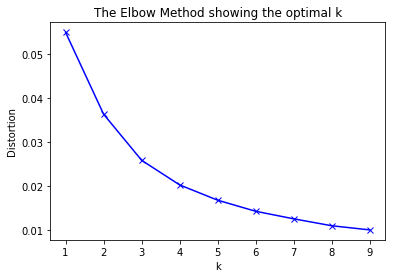

In [52]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy2)
    kmeanModel.fit(hierarchy2)
    distortions.append(sum(np.min(cdist(hierarchy2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy2.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy2)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy2, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""
--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.6283248150926813
For n_clusters=3, The Silhouette Coefficient is 0.5831735457971926
For n_clusters=4, The Silhouette Coefficient is 0.5477067151228406
For n_clusters=5, The Silhouette Coefficient is 0.5315661952956746
For n_clusters=6, The Silhouette Coefficient is 0.5276637871796089
For n_clusters=7, The Silhouette Coefficient is 0.5305875227215471
For n_clusters=8, The Silhouette Coefficient is 0.5175514532368998
For n_clusters=9, The Silhouette Coefficient is 0.5239805159500566
For n_clusters=10, The Silhouette Coefficient is 0.5258364734902196
""")

Text(0.5, 1.0, '2D K-means Result')

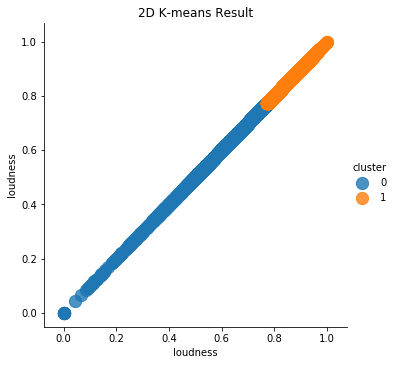

In [505]:
hierarchy2 = songs_1[['loudness']]

# Fit the model.
model = KMeans(n_clusters=2,random_state=1).fit(hierarchy2)

# Get results.
hierarchy2['cluster'] = model.predict(hierarchy2)

# 결과값 살펴보기
hierarchy2['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('loudness','loudness',data = hierarchy2, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

In [162]:
# # # 나타난 특성에 따라서 실제 곡들 살펴보기
hierarchy2=pd.concat([songs[['track_name','artist_name','url']], hierarchy2], axis=1)
hierarchy2df = pd.DataFrame(hierarchy2)

In [167]:
print(len(hierarchy2df.loc[(hierarchy2df['cluster']==0), :]))
print(len(hierarchy2df.loc[(hierarchy2df['cluster']==1), :]))
hierarchy2df0 = hierarchy2df.loc[(hierarchy2df['cluster']==0)&(hierarchy2df['loudness'] < 0.6), :].head(10)
hierarchy2df1 = hierarchy2df.loc[(hierarchy2df['cluster']==1)&(hierarchy2df['loudness'] <= 0.95), :].head(10)
hierarchy2df1.head(10)

23817
145482


,track_name,artist_name,url,loudness,cluster
0,In The End,Linkin Park,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,0.863860,1
1,Kryptonite,3 Doors Down,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,0.875127,1
2,The Real Slim Shady,Eminem,https://open.spotify.com/track/3yfqSUWxFvZELEM...,0.898048,1
3,Ms. Jackson,OutKast,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,0.871291,1
4,Yellow,Coldplay,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,0.850642,1
5,Bye Bye Bye,*NSYNC,https://open.spotify.com/track/62bOmKYxYg7dhrC...,0.889070,1
6,Ride Wit Me,Nelly,https://open.spotify.com/track/06iMqWThw4w8fTF...,0.860346,1
7,Oops!...I Did It Again,Britney Spears,https://open.spotify.com/track/6naxalmIoLFWR0s...,0.879382,1
8,Hey Jude - Remastered 2015,The Beatles,https://open.spotify.com/track/0aym2LBJBk9DAYu...,0.843018,1
9,It Wasn't Me,Shaggy,https://open.spotify.com/track/1Bt6TZfF8FSqdiH...,0.890923,1


## 해석


In [168]:
print("------------------군집 1의 곡들-----------------")
for i in hierarchy2df1['url']:
    print(i)
    
print("------------------군집 0의 곡들-----------------")
for i in hierarchy2df0['url']:
    print(i)

------------------군집 1의 곡들-----------------
https://open.spotify.com/track/60a0Rd6pjrkxjPbaKzXjfq
https://open.spotify.com/track/6ZOBP3NvffbU4SZcrnt1k6
https://open.spotify.com/track/3yfqSUWxFvZELEM4PmlwIR
https://open.spotify.com/track/0I3q5fE6wg7LIfHGngUTnV
https://open.spotify.com/track/3AJwUDP919kvQ9QcozQPxg
https://open.spotify.com/track/62bOmKYxYg7dhrC6gH9vFn
https://open.spotify.com/track/06iMqWThw4w8fTFyccvOwr
https://open.spotify.com/track/6naxalmIoLFWR0siv8dnQQ
https://open.spotify.com/track/0aym2LBJBk9DAYuHHutrIl
https://open.spotify.com/track/1Bt6TZfF8FSqdiHPN0vy4u
------------------군집 0의 곡들-----------------
https://open.spotify.com/track/20rmtxljOGVz4T3nSrtAV1
https://open.spotify.com/track/0p21vI2StdprWPtAGftM5c
https://open.spotify.com/track/4E1Rquqd8ZAnOy3BYK0K1Z
https://open.spotify.com/track/2YfZBomGm5Ff4GpJ7Dha9k
https://open.spotify.com/track/2ob7UWoLGnJRC6UrHCr7Rd
https://open.spotify.com/track/4uZI0DIFhIgMtyOWlizVGS
https://open.spotify.com/track/7z8kUK8x96El1IqU4

loudness는 0 1 의 두가지 군집이 형성되었다.      
각 군집의 갯수는   
0 : 23817    
1 : 145482  
이고

로 군집화 되어있고 0 에서 1로 진행될 수록 트랙의 전체적인 데시벨이 높은 곡이 분포합니다.
1 에 가장 가까운 곡들을 살펴보면 대부분 락음악으로 
악기구성이 많고 시끄러운 톤으로 이루어져 있음을 확인하였습니다.   
아예 0 인 곡들은 트랙에 아무런 소리가 없었고    
0.1 에 분포하는 트랙은 백색소음, 자연소리 등 음악이 아닌 트랙이 다수 포함 되어 있었습니다.
0.3 잔잔한곡
0.4 잔잔한곡
0.6 Elysium - Klaus Badelt 0.561050
0.8 It Wasn't Me - Shaggy 0.890923	1
0.8 이상의 트랙들부터 대부분 팝에 속하고 0.9 이상의 곡들을 락에 해당하는 곡들이 많이 분포하고 있었다.

따라서 우리는 0 1 의 값을 인기도 소음정도가 : 높음     
으로 해석하여 군집을 해석할 것입니다.    

In [506]:
# 데이터 삽입
songs['clst_loudness'] = hierarchy2['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,clst_popularity,clst_loudness
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,2,1
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,11,0.1680,-5.708,0,0.0286,99.010,4,0.543,2,1
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,5,0.0453,-4.286,0,0.0610,104.504,4,0.760,2,1
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,4,0.0771,-5.946,0,0.2690,94.946,4,0.615,2,1
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,11,0.2340,-7.227,1,0.0281,173.365,4,0.285,2,1


## >>>>> 3 tempo
분당 비트 수 (BPM)로 트랙의 전체 예상 템포.   

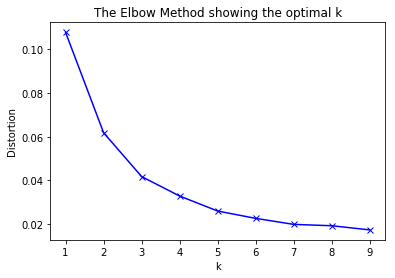

In [139]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy3)
    kmeanModel.fit(hierarchy3)
    distortions.append(sum(np.min(cdist(hierarchy3, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy3.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [140]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy3)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy3, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""
--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.5559078591897524
For n_clusters=3, The Silhouette Coefficient is 0.5847977944526075
For n_clusters=4, The Silhouette Coefficient is 0.5662586255868184
For n_clusters=5, The Silhouette Coefficient is 0.5594814665696084
For n_clusters=6, The Silhouette Coefficient is 0.5324077355241575
For n_clusters=7, The Silhouette Coefficient is 0.5485038791541461
For n_clusters=8, The Silhouette Coefficient is 0.5530242374947697
For n_clusters=9, The Silhouette Coefficient is 0.5432055458090275
For n_clusters=10, The Silhouette Coefficient is 0.5352567110622616
""")


--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.5559078591897524
For n_clusters=3, The Silhouette Coefficient is 0.5847977944526075
For n_clusters=4, The Silhouette Coefficient is 0.5662586255868184
For n_clusters=5, The Silhouette Coefficient is 0.5594814665696084
For n_clusters=6, The Silhouette Coefficient is 0.5324077355241575
For n_clusters=7, The Silhouette Coefficient is 0.5485038791541461
For n_clusters=8, The Silhouette Coefficient is 0.5530242374947697
For n_clusters=9, The Silhouette Coefficient is 0.5432055458090275
For n_clusters=10, The Silhouette Coefficient is 0.5352567110622616



Text(0.5, 1.0, '2D K-means Result')

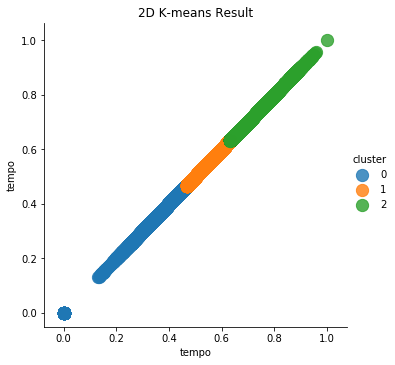

In [507]:
hierarchy3 = songs_1[['tempo']]

# Fit the model.
model = KMeans(n_clusters=3, random_state=12).fit(hierarchy3)

# Get results.
hierarchy3['cluster'] = model.predict(hierarchy3)

# 결과값 살펴보기
hierarchy3['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('tempo','tempo',data = hierarchy3, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

In [187]:
# # # 나타난 특성에 따라서 실제 곡들 살펴보기
hierarchy3=pd.concat([songs[['track_name','artist_name','url']], hierarchy3], axis=1)
hierarchy3df = pd.DataFrame(hierarchy3)

In [226]:
print(len(hierarchy3df.loc[(hierarchy3df['cluster']==0), :]))
print(len(hierarchy3df.loc[(hierarchy3df['cluster']==1), :]))
print(len(hierarchy3df.loc[(hierarchy3df['cluster']==2), :]))
hierarchy3df0 = hierarchy3df.loc[(hierarchy3df['cluster']==0), :].sort_values(by='tempo',ascending=False).head(10)
hierarchy3df1 = hierarchy3df.loc[(hierarchy3df['cluster']==1), :].sort_values(by='tempo',ascending=False).head(10)
hierarchy3df2 = hierarchy3df.loc[(hierarchy3df['cluster']==2), :].sort_values(by='tempo',ascending=False).head(10)
hierarchy3tempo0 = hierarchy3df.loc[(hierarchy3df['cluster']==0)&(hierarchy3df['tempo']==0.0), :].head(10)
hierarchy3tempo1 = hierarchy3df.loc[(hierarchy3df['cluster']==2)&(hierarchy3df['tempo']>=0.99), :].head(10)
hierarchy3df0

66320
70703
32276


,track_name,artist_name,url,tempo,cluster
11148,Phone Went West,My Morning Jacket,https://open.spotify.com/track/2Hyd1zEIJZ1LUXw...,0.466758,0
125710,Lit from Underneath,Andrew Bird,https://open.spotify.com/track/69Rf00gat6GCwJj...,0.466758,0
28314,Secretary,Betty Wright,https://open.spotify.com/track/1n7WmfoozVGuudT...,0.466754,0
6714,Nací Con Suerte De Rey,Los Originales De San Juan,https://open.spotify.com/track/7vwyZsnk1A1DMQ7...,0.466750,0
95782,El Calabazo,Beto Quintanilla,https://open.spotify.com/track/1MzaynkcGMRoECC...,0.466728,0
143501,Das Meeresrauschen und die frische Meeresluft ...,Kings of Nature,https://open.spotify.com/track/1DPc36Ggkar2hy9...,0.466720,0
138195,Bibbidi-Bobbidi-Boo (The Magic Song),Helena Bonham Carter,https://open.spotify.com/track/0tZqXCvOx44WKqc...,0.466720,0
41809,Creed,Third Day,https://open.spotify.com/track/5wsH2jGboER8WPP...,0.466707,0
167289,I Wonder (Departure),Lily James,https://open.spotify.com/track/2wcs7pwj5bzhVod...,0.466698,0
45753,Black Balloon - Live Version,The Goo Goo Dolls,https://open.spotify.com/track/2pelempgGtYnJHG...,0.466698,0


In [217]:
hierarchy3tempo1

,track_name,artist_name,url,tempo,cluster
38319,O Christmas Tree,Tony Bennett,https://open.spotify.com/track/2VsCE6ui7N4IRzG...,1.0,2


## 해석

In [224]:
print("------------------군집 2의 곡들-----------------")
for i in hierarchy3df2['url']:
    print(i)
    
print("------------------군집 1의 곡들-----------------")
for i in hierarchy3df1['url']:
    print(i)
    
print("------------------군집 0의 곡들-----------------")
for i in hierarchy3df0['url']:
    print(i)
    
print("------------------tempo 0의 곡들-----------------")
for i in hierarchy3tempo0['url']:
    print(i)
    
print("------------------tempo 1의 곡들-----------------")
for i in hierarchy3tempo1['url']:
    print(i)

------------------군집 2의 곡들-----------------
https://open.spotify.com/track/2VsCE6ui7N4IRzGIGT7Di8
https://open.spotify.com/track/4sUDzWxexOXI3ul441qbXA
https://open.spotify.com/track/3qBxoudRLiLbFl7Ansz1Uh
https://open.spotify.com/track/1DZfcSkibPHM9h8lPFT7LT
https://open.spotify.com/track/30UkHpzAOHM22GAdae8zYJ
https://open.spotify.com/track/2fSW54bA6x2iWePU7rpCiP
https://open.spotify.com/track/1zwOqDG0DUKEwJM0uNHn4R
https://open.spotify.com/track/5XeQwnRQKbdjXnr1ZKRx9o
https://open.spotify.com/track/2lOz2PFKoK2cfViA5R6fRJ
https://open.spotify.com/track/1sVEMvGdoXJidOVKoBhhmw
------------------군집 1의 곡들-----------------
https://open.spotify.com/track/5gcrQdAdVpLRgp2Dh5W5Lh
https://open.spotify.com/track/0Ua9vUyNzl4PVtatUjaURv
https://open.spotify.com/track/0Etdshb7TsPs3kPII6V0cR
https://open.spotify.com/track/4GZ3qSMYlQODUdxAzM1S1E
https://open.spotify.com/track/60e99JgQqSNQxRdk7bTG03
https://open.spotify.com/track/2RluygGfiWMmFwVmzMxiYk
https://open.spotify.com/track/0aym2LBJBk9DAYuHH

loudness는 0 1 의 두가지 군집이 형성되었다.        
각 군집의 갯수는   
0 : 66320   
1 : 70703    
2 : 32276   
이고   

로 군집화 되어있고 0 에서 2로 진행될 수록 트랙의 전체적인 BPM이 증가합니다..   
그래프를 살펴 보았을 때 각 0 과 1의 값이 점으로 나와있습니다.    
이 곡들을 확인 해 본 결과    

0 : https://open.spotify.com/track/5IGYPdHMSG4PLXDS9LDPJS    
1 : https://open.spotify.com/track/2VsCE6ui7N4IRzGIGT7Di8     
이 결과들은 이상치로 판단하였고, 극히 소수의 곡이므로 삭제하고 진행하도록 하겠습니다.    
  
0.466758 Phone Went West	My Morning Jacket - https://open.spotify.com/track/2Hyd1zEIJZ1LUXw4M1V8Wh   
0.632661 Overture To Candide	United States Marine Band	https://open.spotify.com/track/5gcrQdAdVpLRgp2Dh5W5Lh   
0.959259 Closer	Floetry -	https://open.spotify.com/album/6u3NZOGzpHtBoTp9gPshVL   


In [508]:
# 데이터 삽입
songs['clst_tempo'] = hierarchy3['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,clst_popularity,clst_loudness,clst_tempo
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,0.1080,-6.407,0,0.0498,105.256,4,0.370,2,1,0
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,0.1680,-5.708,0,0.0286,99.010,4,0.543,2,1,0
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,0.0453,-4.286,0,0.0610,104.504,4,0.760,2,1,0
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,0.0771,-5.946,0,0.2690,94.946,4,0.615,2,1,0
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,0.2340,-7.227,1,0.0281,173.365,4,0.285,2,1,2


## >>>>> 4 time_signature
박자

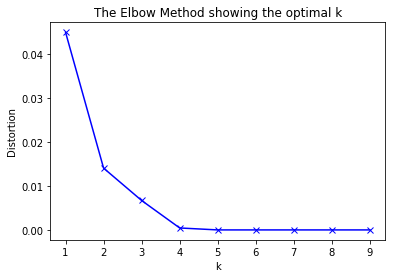

In [227]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy4)
    kmeanModel.fit(hierarchy4)
    distortions.append(sum(np.min(cdist(hierarchy4, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy4.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy4)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy4, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""
--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.9742156057571612
For n_clusters=3, The Silhouette Coefficient is 0.9815542787199448
For n_clusters=4, The Silhouette Coefficient is 0.9998708078931069
For n_clusters=5, The Silhouette Coefficient is 1.0
For n_clusters=6, The Silhouette Coefficient is 1.0
For n_clusters=7, The Silhouette Coefficient is 1.0
For n_clusters=8, The Silhouette Coefficient is 1.0
For n_clusters=9, The Silhouette Coefficient is 1.0
For n_clusters=10, The Silhouette Coefficient is 1.0

""")

Text(0.5, 1.0, '2D K-means Result')

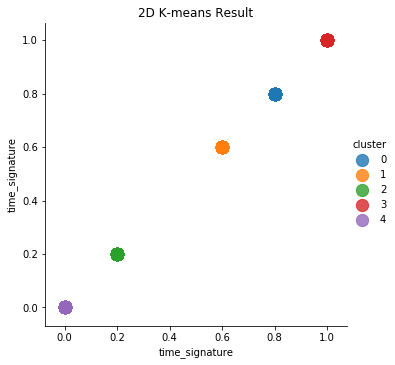

In [510]:
hierarchy4 = songs_1[['time_signature']]

# Fit the model.
model = KMeans(n_clusters=5,random_state=0).fit(hierarchy4)

# Get results.
hierarchy4['cluster'] = model.predict(hierarchy4)

# 결과값 살펴보기
hierarchy4['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('time_signature','time_signature',data = hierarchy4, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

## 해석

이 데이터는 한마디에 몇박자가 들어가는지 측정해 놓은 범주형 자료이기 때문에     
더 자세한 해석이 필요 없으므로 나타나는 5개의 값만 구분한 채로 넘어가겠다.

In [511]:
# 데이터 삽입
songs['clst_time_signature'] = hierarchy4['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,loudness,mode,speechiness,tempo,time_signature,valence,clst_popularity,clst_loudness,clst_tempo,clst_time_signature
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,-6.407,0,0.0498,105.256,4,0.370,2,1,0,0
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,-5.708,0,0.0286,99.010,4,0.543,2,1,0,0
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,-4.286,0,0.0610,104.504,4,0.760,2,1,0,0
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,-5.946,0,0.2690,94.946,4,0.615,2,1,0,0
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,-7.227,1,0.0281,173.365,4,0.285,2,1,2,0


## >>>>> 5 acousticness
트랙의 음향에서 어쿠스틱 요소 여부에 대해 0.0에서 1.0까지의 특성을 측정.    
1.0은 트랙이 어쿠스틱적이라는 측정.    

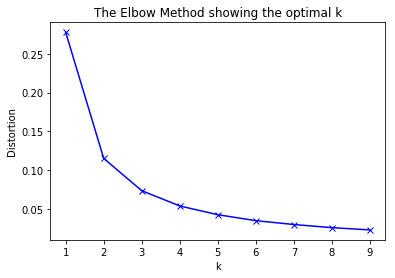

In [229]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy5)
    kmeanModel.fit(hierarchy5)
    distortions.append(sum(np.min(cdist(hierarchy5, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy5.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy5)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy5, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""
--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.7231575171382643
For n_clusters=3, The Silhouette Coefficient is 0.6728928851406547
For n_clusters=4, The Silhouette Coefficient is 0.6515717480964063
For n_clusters=5, The Silhouette Coefficient is 0.6375164183102188
For n_clusters=6, The Silhouette Coefficient is 0.6197537456232791
For n_clusters=7, The Silhouette Coefficient is 0.6143940264152659
For n_clusters=8, The Silhouette Coefficient is 0.6002197880660268
For n_clusters=9, The Silhouette Coefficient is 0.5960973970735999
For n_clusters=10, The Silhouette Coefficient is 0.5960681157818892
""")

Text(0.5, 1.0, '2D K-means Result')

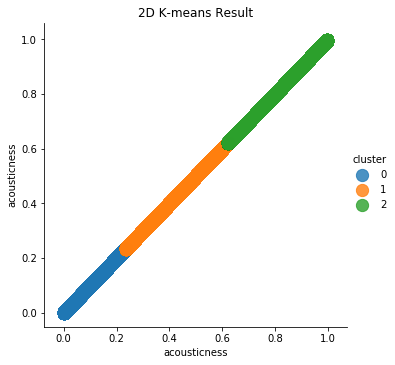

In [512]:
hierarchy5 = songs_1[['acousticness']]

# Fit the model.
model = KMeans(n_clusters=3, random_state=14).fit(hierarchy5) # 0 3 4 1 2 5 7 6 8 9 10 12 11 14 

# Get results.
hierarchy5['cluster'] = model.predict(hierarchy5)

# 결과값 살펴보기
hierarchy5['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('acousticness','acousticness',data = hierarchy5, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

In [306]:
# # # 나타난 특성에 따라서 실제 곡들 살펴보기
hierarchy5=pd.concat([songs[['track_name','artist_name','url']], hierarchy5], axis=1)
hierarchy5df = pd.DataFrame(hierarchy5)

In [307]:
# 각 군집의 갯수 
print(len(hierarchy5df.loc[(hierarchy5df['cluster']==0), :]))
print(len(hierarchy5df.loc[(hierarchy5df['cluster']==1), :]))
print(len(hierarchy5df.loc[(hierarchy5df['cluster']==2), :]))
# 군집별 가장 최고값들의 10개 값 살펴보기
hierarchy5df0 = hierarchy5df.loc[(hierarchy5df['cluster']==0), :].sort_values(by='acousticness',ascending=False).head(10)
hierarchy5df1 = hierarchy5df.loc[(hierarchy5df['cluster']==1), :].sort_values(by='acousticness',ascending=False).head(10)
hierarchy5df2 = hierarchy5df.loc[(hierarchy5df['cluster']==2), :].sort_values(by='acousticness',ascending=False).head(10)
# 특정값 살펴보기
hierarchy5tempo0 = hierarchy5df.loc[(hierarchy5df['cluster']==0)&(hierarchy5df['acousticness']==0.0), :].head(10)
hierarchy5tempo1 = hierarchy5df.loc[(hierarchy5df['cluster']==2)&(hierarchy5df['acousticness']>=0.99), :].head(10)
hierarchy5df2

96714
36428
36157


,track_name,artist_name,url,acousticness,cluster
84293,Last Song,Alexis Ffrench,https://open.spotify.com/track/5YfZknxIgQayJKa...,0.996,2
112828,Night Hawk Soars,Joseph FireCrow,https://open.spotify.com/track/5iBpK8J8D7if3lm...,0.996,2
91186,Anahata - Heart,Jessita Reyes,https://open.spotify.com/track/0IrS9Jhg1LzZmjD...,0.996,2
9245,"5 Esquisses, Op. 114: No. 2. Winter Scene",Jean Sibelius,https://open.spotify.com/track/7HtiS6ubdQ8vUOM...,0.996,2
32257,Childhood (2),Yann Tiersen,https://open.spotify.com/track/3aUZv357Bz6okQy...,0.996,2
22275,Gnossiennes: No. 2 - Avec étonnement,Erik Satie,https://open.spotify.com/track/3VEDyEAADJtwHpl...,0.996,2
43998,Opus 30,Dustin O'Halloran,https://open.spotify.com/track/20o27IvVWCRmVif...,0.996,2
153534,"For Children Vol. 1, Sz. 42: No. 3 Quasi adagio",Béla Bartók,https://open.spotify.com/track/2b12Hb86ANOA56D...,0.996,2
147981,Morning Whisper,Novo Talos,https://open.spotify.com/track/1Jj5GOtn7BoyruC...,0.996,2
160340,Summerwind,David Galtszyk,https://open.spotify.com/track/0ANizlkD2YD1phW...,0.996,2


In [308]:
print("------------------군집 0의 곡들-----------------")
for i in hierarchy5df0['url']:
    print(i)
    
print("------------------군집 1의 곡들-----------------")
for i in hierarchy5df1['url']:
    print(i)
    
print("------------------군집 2의 곡들-----------------")
for i in hierarchy5df2['url']:
    print(i)


------------------군집 0의 곡들-----------------
https://open.spotify.com/track/1p1IzNhoqoDpAJGDeHYofr
https://open.spotify.com/track/4SE4yewyGpOYfxfx59Yjc5
https://open.spotify.com/track/15NKhX4nFexzyivhRJRXcs
https://open.spotify.com/track/5oNlBs0y1lB8tBA65E7abl
https://open.spotify.com/track/6pjtzCoLhSQeQQmPEFad3F
https://open.spotify.com/track/6ZB66u9ew0gjmIxtJzzR59
https://open.spotify.com/track/0IYbYGGVKQGlcaIu9Bs1Iz
https://open.spotify.com/track/0gPDLwKKzIwEv9OQsNfxhN
https://open.spotify.com/track/6UzYTq2NG3LdYDFQi2Kxxm
https://open.spotify.com/track/0mGvaKpwLYoybnIoboC3uS
------------------군집 1의 곡들-----------------
https://open.spotify.com/track/5zMioZMaKO0HoPBZ42NJXm
https://open.spotify.com/track/0t9AVHF5RsbFQr9d8kVySv
https://open.spotify.com/track/38nwdi1gZfoXsDFrk4eSF4
https://open.spotify.com/track/2vJAjPkVMPKkR3xd2wacZa
https://open.spotify.com/track/5gC7CNlRlaJCt7edPrinWQ
https://open.spotify.com/track/1lT7zYqn3ilEBkbiFCauVD
https://open.spotify.com/track/7CdPxuzHTYf9MJMlv

## 해석

0.234 / What's It Gonna Be (feat. Janet Jackson)	Busta Rhymes https://open.spotify.com/track/1p1IzNhoqoDpAJGDeHYofr    
0.62 /  Heroes & Thieves	Vanessa Carlton https://open.spotify.com/track/5zMioZMaKO0HoPBZ42NJXm     
0.996 /  Last Song	Alexis Ffrench	 https://open.spotify.com/track/5YfZknxIgQayJKaMn5Z11G     

0 에서 1까지의 분포가 존재하며 0은 기계적인 음향처리가 많이된 곡이며, 1로 갈수록 곡에 아무런 음향처리를 하지 않은 것들이 나타난다.

In [513]:
# 데이터 삽입
songs['clst_acousticness'] = hierarchy5['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,mode,speechiness,tempo,time_signature,valence,clst_popularity,clst_loudness,clst_tempo,clst_time_signature,clst_acousticness
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,0,0.0498,105.256,4,0.370,2,1,0,0,0
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,0,0.0286,99.010,4,0.543,2,1,0,0,0
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,0,0.0610,104.504,4,0.760,2,1,0,0,0
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,0,0.2690,94.946,4,0.615,2,1,0,0,0
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,1,0.0281,173.365,4,0.285,2,1,2,0,0


## >>>>> 6 danceability
곡이 가지는 템포, 리듬의 안정성, 박자 강도 및 전반적인 규칙성을 포함한 음악 요소의 조합에 따라 춤에 적합한 트랙을 설명합니다.    
0.0 부터 1.0까지의 값이 존재하고, 1.0은 가장 무용에 적합합니다.     

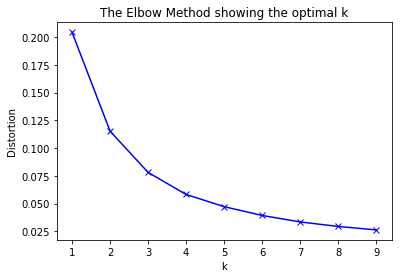

In [237]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy7)
    kmeanModel.fit(hierarchy7)
    distortions.append(sum(np.min(cdist(hierarchy7, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy7.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [239]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy6)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy6, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""
--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.5668990922416474
For n_clusters=3, The Silhouette Coefficient is 0.5402227258536184
For n_clusters=4, The Silhouette Coefficient is 0.5319269406024023
For n_clusters=5, The Silhouette Coefficient is 0.5244312184157359
For n_clusters=6, The Silhouette Coefficient is 0.5296495247942999
For n_clusters=7, The Silhouette Coefficient is 0.5227960414489765
For n_clusters=8, The Silhouette Coefficient is 0.5226658081465275
For n_clusters=9, The Silhouette Coefficient is 0.5260552296634247
For n_clusters=10, The Silhouette Coefficient is 0.5284788538834818
""")


--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.5668990922416474
For n_clusters=3, The Silhouette Coefficient is 0.5402227258536184
For n_clusters=4, The Silhouette Coefficient is 0.5319269406024023
For n_clusters=5, The Silhouette Coefficient is 0.5244312184157359
For n_clusters=6, The Silhouette Coefficient is 0.5296495247942999
For n_clusters=7, The Silhouette Coefficient is 0.5227960414489765
For n_clusters=8, The Silhouette Coefficient is 0.5226658081465275
For n_clusters=9, The Silhouette Coefficient is 0.5260552296634247
For n_clusters=10, The Silhouette Coefficient is 0.5284788538834818



Text(0.5, 1.0, '2D K-means Result')

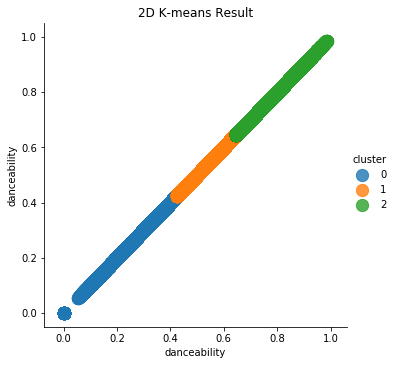

In [514]:
hierarchy6 = songs_1[['danceability']]

# Fit the model.
model = KMeans(n_clusters=3, random_state=5).fit(hierarchy6)

# Get results.
hierarchy6['cluster'] = model.predict(hierarchy6)

# 결과값 살펴보기
hierarchy6['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('danceability','danceability',data = hierarchy6, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

In [261]:
# # # 나타난 특성에 따라서 실제 곡들 살펴보기
hierarchy6=pd.concat([songs[['track_name','artist_name','url']], hierarchy6], axis=1)
hierarchy6df = pd.DataFrame(hierarchy6)

In [266]:
# 각 군집의 갯수 
print(len(hierarchy6df.loc[(hierarchy6df['cluster']==0), :]))
print(len(hierarchy6df.loc[(hierarchy6df['cluster']==1), :]))
print(len(hierarchy6df.loc[(hierarchy6df['cluster']==2), :]))
# 군집별 가장 최고값들의 10개 값 살펴보기
hierarchy6df0 = hierarchy6df.loc[(hierarchy6df['cluster']==0), :].sort_values(by='danceability',ascending=False).head(10)
hierarchy6df1 = hierarchy6df.loc[(hierarchy6df['cluster']==1), :].sort_values(by='danceability',ascending=False).head(10)
hierarchy6df2 = hierarchy6df.loc[(hierarchy6df['cluster']==2), :].sort_values(by='danceability',ascending=False).head(10)

hierarchy6df2

36454
74648
58197


,track_name,artist_name,url,danceability,cluster
96568,Walk Away,Ms Krazie,https://open.spotify.com/track/2oSgHJcoigviskL...,0.987,2
68331,Go Girl,Trina,https://open.spotify.com/track/6Ksb7nVVaNWKyuL...,0.986,2
111534,Go Girl,Pitbull,https://open.spotify.com/track/1MgM0WDaoQ2A3bn...,0.986,2
67030,Go Girl,Young Boss,https://open.spotify.com/track/5IbMUI4rcWtXlq8...,0.986,2
20864,Stay Don’t Go,Spoon,https://open.spotify.com/track/1CiVOY9FCW2ibIr...,0.985,2
167605,"POP, LOCK & DROPDEAD",ITSOKTOCRY,https://open.spotify.com/track/0WOnTxy6mBHAo5f...,0.985,2
87966,Funky Cold Medina (Re-Recorded / Remastered),Tone-Loc,https://open.spotify.com/track/6tKRyHen4zoLtt9...,0.984,2
153648,Poor Relations,Mr Twin Sister,https://open.spotify.com/track/2OPmmqhPLBbHoHw...,0.984,2
17671,Funky Cold Medina,Tone-Loc,https://open.spotify.com/track/2n3HLmTgkixKh4G...,0.984,2
24546,Sinabmarin,Andrew E.,https://open.spotify.com/track/6FSy6XIh936l5gn...,0.984,2


In [264]:
print("------------------군집 0의 곡들-----------------")
for i in hierarchy6df0['url']:
    print(i)
    
print("------------------군집 1의 곡들-----------------")
for i in hierarchy6df1['url']:
    print(i)
    
print("------------------군집 2의 곡들-----------------")
for i in hierarchy6df2['url']:
    print(i)


------------------군집 0의 곡들-----------------
https://open.spotify.com/track/7blzWBd1NN4DPWXkM9s2vF
https://open.spotify.com/track/7G852cXa8LBspMja7NvTSs
https://open.spotify.com/track/1IskSuDYrksv3SiaDVGMah
https://open.spotify.com/track/3t8g35pJTDnfr8SyleZv6T
https://open.spotify.com/track/0e4GxC1u8gzQ98RrbQTiCn
https://open.spotify.com/track/2cAybAa8GqYLhiqgrkrNUp
https://open.spotify.com/track/6pTtc2sEanQArBBNUSmz5d
https://open.spotify.com/track/2gjdOPKyBdSTd3bepecmyZ
https://open.spotify.com/track/6D4vhXwVrO2OCgZvqEjsuA
https://open.spotify.com/track/3fjCqjypAHUNhfkujitTJn
------------------군집 1의 곡들-----------------
https://open.spotify.com/track/0meEfMgeiaEhRCtNdofM5L
https://open.spotify.com/track/6AIdumKAtpL7MbeizK6Z4P
https://open.spotify.com/track/5BfJHkiSwbmmRwubZnCR4X
https://open.spotify.com/track/0rmiODrzMfu23Z5Yfc3pXw
https://open.spotify.com/track/473SizAMoQBwQXdnF3dhnu
https://open.spotify.com/track/5NetSTs4dgiR6GLrZOQcwJ
https://open.spotify.com/track/0vyVsDtLIJmq3kV3o

## 해석

Farewell	Dirty Heads	https://open.spotify.com/track/7blzWBd1NN4DPWXkM9s2vF	0.424	0    
Young Love	Chris Brown	https://open.spotify.com/track/0meEfMgeiaEhRCtNdofM5L	0.645	1    
Go Girl	Trina	https://open.spotify.com/track/6Ksb7nVVaNWKyuLzPfdyZD	0.986	2    

    
각 군집의 대표적인 곡들을 들어보았을 때    
0 : 춤에 어울리지 않는다.   
1 : 조금 춤에 어울린다.   
2 : 춤에 적합하다.    
라고 해석하였습니다.    

In [515]:
# 데이터 삽입
songs['clst_danceability'] = hierarchy6['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,speechiness,tempo,time_signature,valence,clst_popularity,clst_loudness,clst_tempo,clst_time_signature,clst_acousticness,clst_danceability
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,0.0498,105.256,4,0.370,2,1,0,0,0,1
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,0.0286,99.010,4,0.543,2,1,0,0,0,1
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,0.0610,104.504,4,0.760,2,1,0,0,0,2
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,0.2690,94.946,4,0.615,2,1,0,0,0,2
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,0.0281,173.365,4,0.285,2,1,2,0,0,1


## >>>>> 7 energy
곡이 얼마나 강렬하고 활동적인지를 측정한 값. 0.0에서 1.0까지 값이 존재.  
이 속성에 기여하는 지각 특징은 동적 범위,인지 된 소리 크기, 음색, 시작 속도 및 일반 엔트로피를 포함합니다.   

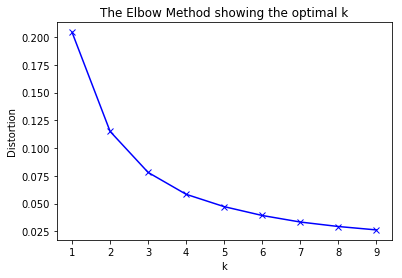

In [269]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy7)
    kmeanModel.fit(hierarchy7)
    distortions.append(sum(np.min(cdist(hierarchy7, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy7.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [270]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy7)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy7, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""
--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.5884893241728968
For n_clusters=3, The Silhouette Coefficient is 0.5591569656953753
For n_clusters=4, The Silhouette Coefficient is 0.5540768747848006
For n_clusters=5, The Silhouette Coefficient is 0.5416728263299176
For n_clusters=6, The Silhouette Coefficient is 0.533423732960354
For n_clusters=7, The Silhouette Coefficient is 0.5394039732052476
For n_clusters=8, The Silhouette Coefficient is 0.5346137207027504
For n_clusters=9, The Silhouette Coefficient is 0.5290859226048613
For n_clusters=10, The Silhouette Coefficient is 0.5301602780732029
""")


--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.5884893241728968
For n_clusters=3, The Silhouette Coefficient is 0.5591569656953753
For n_clusters=4, The Silhouette Coefficient is 0.5540768747848006
For n_clusters=5, The Silhouette Coefficient is 0.5416728263299176
For n_clusters=6, The Silhouette Coefficient is 0.533423732960354
For n_clusters=7, The Silhouette Coefficient is 0.5394039732052476
For n_clusters=8, The Silhouette Coefficient is 0.5346137207027504
For n_clusters=9, The Silhouette Coefficient is 0.5290859226048613
For n_clusters=10, The Silhouette Coefficient is 0.5301602780732029



Text(0.5, 1.0, '2D K-means Result')

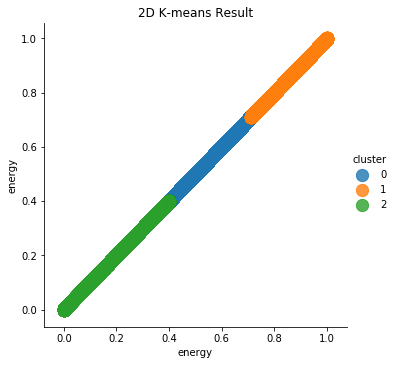

In [516]:

hierarchy7 = songs_1[['energy']]

# Fit the model.
model = KMeans(n_clusters=3, random_state=5).fit(hierarchy7) # 

# Get results.
hierarchy7['cluster'] = model.predict(hierarchy7)

# 결과값 살펴보기
hierarchy7['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('energy','energy',data = hierarchy7, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

In [517]:
# 군집화 결과 알기 쉽게 변경하기
hierarchy7.loc[hierarchy7['cluster']==2,'cluster'] = 4
hierarchy7.loc[hierarchy7['cluster']==0,'cluster'] = 5
hierarchy7.loc[hierarchy7['cluster']==1,'cluster'] = 6
hierarchy7.loc[hierarchy7['cluster']==4,'cluster'] = 0
hierarchy7.loc[hierarchy7['cluster']==5,'cluster'] = 1
hierarchy7.loc[hierarchy7['cluster']==6,'cluster'] = 2

In [401]:
# # # 나타난 특성에 따라서 실제 곡들 살펴보기
hierarchy7=pd.concat([songs[['track_name','artist_name','url']], hierarchy7], axis=1)
hierarchy7df = pd.DataFrame(hierarchy7)

In [404]:
# 각 군집의 갯수 
print(len(hierarchy7df.loc[(hierarchy7df['cluster']==0), :]))
print(len(hierarchy7df.loc[(hierarchy7df['cluster']==1), :]))
print(len(hierarchy7df.loc[(hierarchy7df['cluster']==2), :]))
# 군집별 가장 최고값들의 10개 값 살펴보기
hierarchy7df0 = hierarchy7df.loc[(hierarchy7df['cluster']==0), :].sort_values(by='energy',ascending=False).head(10)
hierarchy7df1 = hierarchy7df.loc[(hierarchy7df['cluster']==1), :].sort_values(by='energy',ascending=False).head(10)
hierarchy7df2 = hierarchy7df.loc[(hierarchy7df['cluster']==2), :].sort_values(by='energy',ascending=False).head(10)

hierarchy7df2

32499
64160
72640


,track_name,artist_name,url,energy,cluster
100710,City Rain,Pro Sound Effects Library,https://open.spotify.com/track/63SD2wWvp24HGI8...,1.0,2
4248,Intro,Jeff Foxworthy,https://open.spotify.com/track/38WNVekTrCoYHia...,1.0,2
95530,"Rainforest River to Naturally Calm, Comfort, R...",Soothing White Noise for Infant Sleeping and M...,https://open.spotify.com/track/4yUgnPefkAMkgLV...,1.0,2
116034,A Big Old Downpour,White Noise Research,https://open.spotify.com/track/2ay3BKEbIWexKL9...,1.0,2
114700,Relaxation,Rain Sounds,https://open.spotify.com/track/3fSK6hy3qN8ElaH...,1.0,2
147427,Thunderstorms 3,Thunderstorms,https://open.spotify.com/track/5PxXXZ0NE5MChBe...,1.0,2
16289,Riot,The Casualties,https://open.spotify.com/track/5hWgSDObn6UtvqQ...,1.0,2
101841,3D Thunderstorm Sound Binaural Recording for R...,Nature Sounds Nature Music,https://open.spotify.com/track/0uvaj8ZRr0TBOYQ...,1.0,2
161885,Rain Sound: Tropical Forest,Rain Sounds & White Noise,https://open.spotify.com/track/391WotcLrl94Ey5...,1.0,2
140842,March Rain,Outside Broadcast Recordings,https://open.spotify.com/track/675IcoMZu7tI2b0...,1.0,2


In [405]:
print("------------------군집 0의 곡들-----------------")
for i in hierarchy7df0['url']:
    print(i)
    
print("------------------군집 1의 곡들-----------------")
for i in hierarchy7df1['url']:
    print(i)
    
print("------------------군집 2의 곡들-----------------")
for i in hierarchy7df2['url']:
    print(i)


------------------군집 0의 곡들-----------------
https://open.spotify.com/track/44jk7xjHwbc1oohDh8QxHO
https://open.spotify.com/track/0JYz5FTrZOeZRxOdl8pQCm
https://open.spotify.com/track/7KAGU3dUQ6YuubQWQ1bMws
https://open.spotify.com/track/4CbaUlaRG2j7RrO0nIUXjZ
https://open.spotify.com/track/2sKau00a99lEh04qmo2Gug
https://open.spotify.com/track/6rh7tCci9IVYbEvLwLuXgz
https://open.spotify.com/track/3uXgvfwG946EZG9N0NkhgR
https://open.spotify.com/track/3pKs8S6Xo1nSnE03P1lvC2
https://open.spotify.com/track/0roGkBtLKFrFzI3EXwzolJ
https://open.spotify.com/track/6b2opBidoeyr8hya6elVkM
------------------군집 1의 곡들-----------------
https://open.spotify.com/track/6sJ9sVZDWuuxycGL0Fsx0m
https://open.spotify.com/track/2xO37ku7ZNTDRaPx33a8dl
https://open.spotify.com/track/0koFPJrckCMp8z8OrfoF4T
https://open.spotify.com/track/6A0aFzllLtAIyObyfp2Xpv
https://open.spotify.com/track/01953KKVaBi2vg4ILp8AJV
https://open.spotify.com/track/1n52ulXSj7E3GOjcpw1EKF
https://open.spotify.com/track/13dQb9ZXU7ehRoDLr

## 해석
Darlene	T. Graham Brown	https://open.spotify.com/track/44jk7xjHwbc1oohDh8QxHO 0.401	2
Headlights	Dispatch	https://open.spotify.com/track/6sJ9sVZDWuuxycGL0Fsx0m	0.711	0
City Rain	Pro Sound Effects Library	https://open.spotify.com/track/63SD2wWvp24HGI8tMNMMdL	1.0	1

군집의 순서가 0 1 2 순으로 활력이 높아지는 곡들이다.

1.0 의 값들을 살펴보았을 때 트랙에 잡음이 많이 섞인 것들이 많이 포함되어 있었다.

곡이 얼마나 강렬하고 활동적인지를 측정한 값. 0.0에서 1.0까지 값이 존재.   
일반적으로 활기찬 트랙은 빠르고 시끄럽습니다.   
예를 들어, 데스 메탈은 높은 에너지를 가지고있는 반면 바흐 서곡은 낮은 점수를 얻습니다.    

In [518]:
# 데이터 삽입
songs['clst_energy'] = hierarchy7['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,tempo,time_signature,valence,clst_popularity,clst_loudness,clst_tempo,clst_time_signature,clst_acousticness,clst_danceability,clst_energy
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,105.256,4,0.370,2,1,0,0,0,1,2
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,99.010,4,0.543,2,1,0,0,0,1,2
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,104.504,4,0.760,2,1,0,0,0,2,1
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,94.946,4,0.615,2,1,0,0,0,2,2
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,173.365,4,0.285,2,1,2,0,0,1,1


## >>>>> 8 instrumentalness
트랙에 보컬이 없는지 여부를 예측합니다.    
Instrumentalness 값이 1.0에 가까울수록 트랙에 보컬 콘텐츠가 포함되지 않을 확률이 높아집니다.      

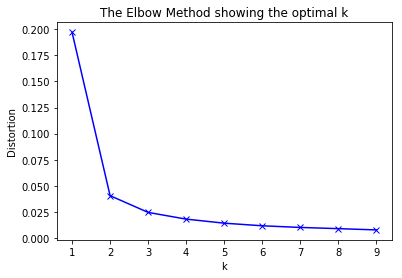

In [370]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy8)
    kmeanModel.fit(hierarchy8)
    distortions.append(sum(np.min(cdist(hierarchy8, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy8.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [371]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy8)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy8, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""
--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.9397776192151874
For n_clusters=3, The Silhouette Coefficient is 0.926664775806935
For n_clusters=4, The Silhouette Coefficient is 0.9152855860250588
For n_clusters=5, The Silhouette Coefficient is 0.9074592549587839
For n_clusters=6, The Silhouette Coefficient is 0.905684876566936
For n_clusters=7, The Silhouette Coefficient is 0.8986700619557062
For n_clusters=8, The Silhouette Coefficient is 0.8946821787691638
For n_clusters=9, The Silhouette Coefficient is 0.8893415278240993
For n_clusters=10, The Silhouette Coefficient is 0.8808221477058428
""")


--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.9397776192151874
For n_clusters=3, The Silhouette Coefficient is 0.926664775806935
For n_clusters=4, The Silhouette Coefficient is 0.9152855860250588
For n_clusters=5, The Silhouette Coefficient is 0.9074592549587839
For n_clusters=6, The Silhouette Coefficient is 0.905684876566936
For n_clusters=7, The Silhouette Coefficient is 0.8986700619557062
For n_clusters=8, The Silhouette Coefficient is 0.8946821787691638
For n_clusters=9, The Silhouette Coefficient is 0.8893415278240993
For n_clusters=10, The Silhouette Coefficient is 0.8808221477058428



Text(0.5, 1.0, '2D K-means Result')

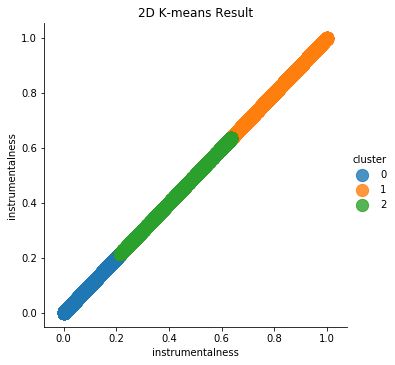

In [519]:
hierarchy8 = songs_1[['instrumentalness']]

# Fit the model.
model = KMeans(n_clusters=3,random_state=24).fit(hierarchy8) # 

# Get results.
hierarchy8['cluster'] = model.predict(hierarchy8)

# 결과값 살펴보기
hierarchy8['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('instrumentalness','instrumentalness',data = hierarchy8, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

In [520]:
# 군집화 결과 알기 쉽게 변경하기
hierarchy8.loc[hierarchy8['cluster']==0,'cluster'] = 4
hierarchy8.loc[hierarchy8['cluster']==2,'cluster'] = 5
hierarchy8.loc[hierarchy8['cluster']==1,'cluster'] = 6
hierarchy8.loc[hierarchy8['cluster']==4,'cluster'] = 0
hierarchy8.loc[hierarchy8['cluster']==5,'cluster'] = 1
hierarchy8.loc[hierarchy8['cluster']==6,'cluster'] = 2

In [408]:
# # # 나타난 특성에 따라서 실제 곡들 살펴보기
hierarchy8=pd.concat([songs[['track_name','artist_name','url']], hierarchy8], axis=1)
hierarchy8df = pd.DataFrame(hierarchy8)

In [414]:
# 각 군집의 갯수 
print(len(hierarchy8df.loc[(hierarchy8df['cluster']==0), :]))
print(len(hierarchy8df.loc[(hierarchy8df['cluster']==1), :]))
print(len(hierarchy8df.loc[(hierarchy8df['cluster']==2), :]))
# 군집별 가장 최고값들의 10개 값 살펴보기
hierarchy8df0 = hierarchy8df.loc[(hierarchy8df['cluster']==0), :].sort_values(by='instrumentalness',ascending=False).head(10)
hierarchy8df1 = hierarchy8df.loc[(hierarchy8df['cluster']==1), :].sort_values(by='instrumentalness',ascending=False).head(10)
hierarchy8df2 = hierarchy8df.loc[(hierarchy8df['cluster']==2), :].sort_values(by='instrumentalness',ascending=False).head(10)

hierarchy8df00 = hierarchy8df.loc[(hierarchy8df['cluster']==0)&(hierarchy8df['instrumentalness']==0.0), :].head(10)

hierarchy8df00

141690
8211
19398


,track_name,artist_name,url,instrumentalness,cluster
0,In The End,Linkin Park,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,0.0,0
2,The Real Slim Shady,Eminem,https://open.spotify.com/track/3yfqSUWxFvZELEM...,0.0,0
3,Ms. Jackson,OutKast,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,0.0,0
6,Ride Wit Me,Nelly,https://open.spotify.com/track/06iMqWThw4w8fTF...,0.0,0
9,It Wasn't Me,Shaggy,https://open.spotify.com/track/1Bt6TZfF8FSqdiH...,0.0,0
12,I Want To Hold Your Hand - Remastered 2015,The Beatles,https://open.spotify.com/track/4pbG9SUmWIvsROV...,0.0,0
13,Country Grammar (Hot Shit),Nelly,https://open.spotify.com/track/2Lg4kvhOrPhpGEZ...,0.0,0
14,Just Another Day In Paradise,Phil Vassar,https://open.spotify.com/track/4LlNoNZflek4hZy...,0.0,0
15,It's A Great Day To Be Alive,Travis Tritt,https://open.spotify.com/track/3oW6SWwGqiZSPTi...,0.0,0
18,(What A) Wonderful World,Sam Cooke,https://open.spotify.com/track/2g2GkH3vZHk4lWz...,0.0,0


In [416]:
print("------------------군집 0의 곡들-----------------")
for i in hierarchy8df0['url']:
    print(i)
    
print("------------------군집 1의 곡들-----------------")
for i in hierarchy8df1['url']:
    print(i)
    
print("------------------군집 2의 곡들-----------------")
for i in hierarchy8df2['url']:
    print(i)

print("------------------값이 0.0 의 곡들-----------------")
for i in hierarchy8df00['url']:
    print(i)


------------------군집 0의 곡들-----------------
https://open.spotify.com/track/2PX54jMPTjvpgAod0oIuIP
https://open.spotify.com/track/4Fl0X6VaYwZxHmWvBtI5tB
https://open.spotify.com/track/7GyOLtFEsKXCUxcWj0re2J
https://open.spotify.com/track/2IsedwzpokWvnYR5cWdaAK
https://open.spotify.com/track/0fxMIXpGObFMpelfT4Iz12
https://open.spotify.com/track/06JRkix5RRMRIWffxZqlGt
https://open.spotify.com/track/4WFocJylxbp7DX23WWKZHW
https://open.spotify.com/track/7jZAh6hAFafnhWRJBX8ivp
https://open.spotify.com/track/5NCXSyDECCrHm12B5wTZO9
https://open.spotify.com/track/5Z3trOR982mBrJcPfrLUsq
------------------군집 1의 곡들-----------------
https://open.spotify.com/track/5L6PkcRdfQSJrRzRYhP15O
https://open.spotify.com/track/6xwhCiWXREsAIQVZqHswVw
https://open.spotify.com/track/3eaLikgJ3ZvPe5Tuv33BVz
https://open.spotify.com/track/5PByJTj8Zqfz6Qs2iwXNAL
https://open.spotify.com/track/6uigfwnAYHacPgsMA9fjLH
https://open.spotify.com/track/5xz5dUtU2xooSP75BwRJ3H
https://open.spotify.com/track/7KhO89I3p6LhLsHyk

## 해석

0 : 141690   
1 : 8211   
2 : 19398    

You've Never Been This Far Before	Conway Twitty	https://open.spotify.com/track/2PX54jMPTjvpgAod0oIuIP	0.213	0
A Light In A Darkened World	Killswitch Engage	https://open.spotify.com/track/5L6PkcRdfQSJrRzRYhP15O	0.636	1
Rain in the Park	Rain Sounds ACE	https://open.spotify.com/track/5aVTpbRU7DM9GfCNydb9MR	1.0	2

트랙에 보컬이 없는지 여부를 예측합니다.    
"우"와 "아"소리는 문맥에서 판단도구로 취급됩니다.    
Instrumentalness 값이 1.0에 가까울수록 트랙에 보컬 콘텐츠가 포함되지 않을 확률이 높아집니다.    
0.5 이상의 값은 악기 트랙을 나타 내기위한 것이지만 값이 1.0에 가까워 질수록 보컬트랙이 포함될 가능성이 높습니다.    
  
실제로 마지막 Rain in the Park을 들어보면 보컬이 전혀 포함되지 않음을 알 수 있습니다.   
나머지 군집에는 보컬들이 포함되어 있습니다.    

0.0 에는 지속해서 보컬이 들어가는 곡이 나타납니다. 랩이 가장 대표적으로 나타납니다. https://open.spotify.com/track/3yfqSUWxFvZELEM4PmlwIR


In [521]:
# 데이터 삽입
songs['clst_instrumentalness'] = hierarchy8['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,time_signature,valence,clst_popularity,clst_loudness,clst_tempo,clst_time_signature,clst_acousticness,clst_danceability,clst_energy,clst_instrumentalness
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,4,0.370,2,1,0,0,0,1,2,0
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,4,0.543,2,1,0,0,0,1,2,0
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,4,0.760,2,1,0,0,0,2,1,0
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,4,0.615,2,1,0,0,0,2,2,0
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,4,0.285,2,1,2,0,0,1,1,0


## >>>>> 9 liveness
0.8보다 큰 값은 트랙이 라이브 트랙일 가능성이 큽니다.

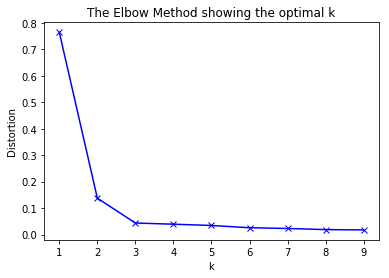

In [420]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy9)
    kmeanModel.fit(hierarchy9)
    distortions.append(sum(np.min(cdist(hierarchy9, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy9.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [421]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy9)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy9, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""
--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.7249971789509388
For n_clusters=3, The Silhouette Coefficient is 0.7118731738851806
For n_clusters=4, The Silhouette Coefficient is 0.6328283232402698
For n_clusters=5, The Silhouette Coefficient is 0.6258582750238566
For n_clusters=6, The Silhouette Coefficient is 0.5215925550661045
For n_clusters=7, The Silhouette Coefficient is 0.5274835130050511
For n_clusters=8, The Silhouette Coefficient is 0.5371589905696009
For n_clusters=9, The Silhouette Coefficient is 0.5344829676138343
For n_clusters=10, The Silhouette Coefficient is 0.5336034360459937
""")


--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.7249971789509388
For n_clusters=3, The Silhouette Coefficient is 0.7118731738851806
For n_clusters=4, The Silhouette Coefficient is 0.6328283232402698
For n_clusters=5, The Silhouette Coefficient is 0.6258582750238566
For n_clusters=6, The Silhouette Coefficient is 0.5215925550661045
For n_clusters=7, The Silhouette Coefficient is 0.5274835130050511
For n_clusters=8, The Silhouette Coefficient is 0.5371589905696009
For n_clusters=9, The Silhouette Coefficient is 0.5344829676138343
For n_clusters=10, The Silhouette Coefficient is 0.5336034360459937



Text(0.5, 1.0, '2D K-means Result')

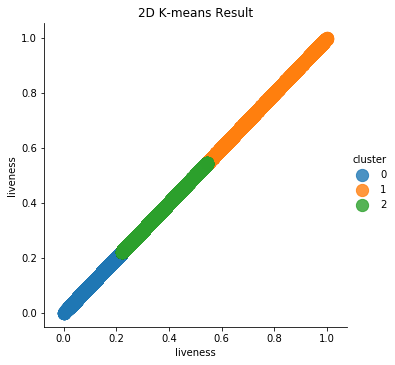

In [522]:
hierarchy9 = songs_1[['liveness']]

# Fit the model.
model = KMeans(n_clusters=3, random_state=0).fit(hierarchy9)

# Get results.
hierarchy9['cluster'] = model.predict(hierarchy9)

# 결과값 살펴보기
hierarchy9['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('liveness','liveness',data = hierarchy9, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

In [523]:
# 군집화 결과 알기 쉽게 변경하기
hierarchy9.loc[hierarchy9['cluster']==0,'cluster'] = 4
hierarchy9.loc[hierarchy9['cluster']==2,'cluster'] = 5
hierarchy9.loc[hierarchy9['cluster']==1,'cluster'] = 6
hierarchy9.loc[hierarchy9['cluster']==4,'cluster'] = 0
hierarchy9.loc[hierarchy9['cluster']==5,'cluster'] = 1
hierarchy9.loc[hierarchy9['cluster']==6,'cluster'] = 2

In [437]:
# # # 나타난 특성에 따라서 실제 곡들 살펴보기
hierarchy9=pd.concat([songs[['track_name','artist_name','url']], hierarchy9], axis=1)
hierarchy9df = pd.DataFrame(hierarchy9)

In [438]:
# 각 군집의 갯수 
print(len(hierarchy9df.loc[(hierarchy9df['cluster']==0), :]))
print(len(hierarchy9df.loc[(hierarchy9df['cluster']==1), :]))
print(len(hierarchy9df.loc[(hierarchy9df['cluster']==2), :]))
# 군집별 가장 최고값들의 10개 값 살펴보기
hierarchy9df0 = hierarchy9df.loc[(hierarchy9df['cluster']==0), :].sort_values(by='liveness',ascending=False).head(10)
hierarchy9df1 = hierarchy9df.loc[(hierarchy9df['cluster']==1), :].sort_values(by='liveness',ascending=False).head(10)
hierarchy9df2 = hierarchy9df.loc[(hierarchy9df['cluster']==2), :].sort_values(by='liveness',ascending=False).head(10)

# hierarchy9df00 = hierarchy9df.loc[(hierarchy9df['cluster']==0)&(hierarchy9df['instrumentalness']==0.0), :].head(10)

hierarchy9df2

119261
38761
11277


,track_name,artist_name,url,liveness,cluster
20895,Up On Cripple Creek - Concert Version,The Band,https://open.spotify.com/track/21Saw6Z6sW4ZJ7H...,1.000,2
87138,Me Quedo Contigo (Si Me Das A Elegir),Manu Chao,https://open.spotify.com/track/6u9GgwXbMs5jJlA...,1.000,2
31158,"Warehouse - Live at Central Park, New York, NY...",Dave Matthews Band,https://open.spotify.com/track/3xOz3tiDs35w9g4...,0.999,2
22026,Life Is A Carnival - Concert Version,The Band,https://open.spotify.com/track/37zBZjgFSOiOHqE...,0.999,2
22768,Don't Do It - Concert Version,The Band,https://open.spotify.com/track/4o5xV1qktSwn9Pc...,0.998,2
103799,"Shameless - Live July 2008 At Shea Stadium, Qu...",Billy Joel,https://open.spotify.com/track/5yIsenAzY9NSwqT...,0.998,2
43421,Sexual Healing - Live,Soul Asylum,https://open.spotify.com/track/4K5VWbubw4TDv4P...,0.998,2
86762,Smells Like Teen Spirit - 1992/Live at Reading,Nirvana,https://open.spotify.com/track/6gVH9jHl5Xpxxl4...,0.997,2
68601,Old Dirt Hill (Bring That Beat Back) - Live at...,Dave Matthews,https://open.spotify.com/track/56SXSA3xgvmBTr1...,0.997,2
100732,"Dancing Nancies - Live at Planet Hollywood, La...",Dave Matthews,https://open.spotify.com/track/2oEY1D8NRHWggiR...,0.997,2


In [439]:
print("------------------군집 0의 곡들-----------------")
for i in hierarchy9df0['url']:
    print(i)
    
print("------------------군집 1의 곡들-----------------")
for i in hierarchy9df1['url']:
    print(i)
    
print("------------------군집 2의 곡들-----------------")
for i in hierarchy9df2['url']:
    print(i)

# print("------------------값이 0.0 의 곡들-----------------")
# for i in hierarchy9df00['url']:
#     print(i)

------------------군집 0의 곡들-----------------
https://open.spotify.com/track/4nSoYuf24aMw7WkDLUcSxw
https://open.spotify.com/track/2HFf8ezVR6UTRRhN6zvT8l
https://open.spotify.com/track/2sWJEg39zCRVBsr6hwqW9g
https://open.spotify.com/track/0X2C7SXAYqdcEfroK5PPql
https://open.spotify.com/track/5oRHn5SijwN4nssSCVBWIe
https://open.spotify.com/track/1pWXyAXV1suOBcsdvMjQOq
https://open.spotify.com/track/0ecaQ32DmWG6KrteSfTl2m
https://open.spotify.com/track/2N67doY77tMPHF0fDizhhL
https://open.spotify.com/track/56cb6XqkAgidNd5VqAljaH
https://open.spotify.com/track/18wtixhJzC2Shhk1A3F8eB
------------------군집 1의 곡들-----------------
https://open.spotify.com/track/7xTf1LSOyqIqLz6GCm9Rz0
https://open.spotify.com/track/05XSpcg3nm0zpDHd36AZOs
https://open.spotify.com/track/5ko7CS18bjmu1iWvrSFEmi
https://open.spotify.com/track/10bSodWJ0q2c63ECltBhIN
https://open.spotify.com/track/75ls0gurX68lUmMjE7QcsE
https://open.spotify.com/track/4IxQS45xVSd2BtULT8Xu0M
https://open.spotify.com/track/5ojvgmvSHPOxn1obG

## 해석

0 : 119261
1 : 38761
2 : 11277

Asi Es El Amor	Tercer Cielo	https://open.spotify.com/track/4nSoYuf24aMw7WkDLUcSxw	0.221	0
Uzi Loogies	 𝑢𝑖𝑐𝑖𝑑𝑒𝐵𝑜𝑦 	https://open.spotify.com/track/7xTf1LSOyqIqLz6GCm9Rz0	0.544	1
Up On Cripple Creek - Concert Version	The Band	https://open.spotify.com/track/21Saw6Z6sW4ZJ7HFgWdvmo	1.000	2
0 과 1번 군집은 앨범일 가능성이 크고 2번 군집은 라이브일 가능성이 있습니다.    

이 분류는 정확하지 않음으로 1 2 번 군집을 묶고 2번 군집을 라이브일 가능성이 높은 군집으로 해석하겠습니다.
결과적으로 군집을 2개로 다시 해석하여 0 1 을 0으로 를 1로 변경하여 사용합니다.    


In [524]:
# 군집화 결과 변경----------------------------------
hierarchy9.loc[hierarchy9['cluster']==0,'cluster'] = 4
hierarchy9.loc[hierarchy9['cluster']==1,'cluster'] = 5
hierarchy9.loc[hierarchy9['cluster']==2,'cluster'] = 6
hierarchy9.loc[hierarchy9['cluster']==4,'cluster'] = 0
hierarchy9.loc[hierarchy9['cluster']==5,'cluster'] = 0
hierarchy9.loc[hierarchy9['cluster']==6,'cluster'] = 1

In [525]:
# 데이터 삽입
songs['clst_liveness'] = hierarchy9['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,valence,clst_popularity,clst_loudness,clst_tempo,clst_time_signature,clst_acousticness,clst_danceability,clst_energy,clst_instrumentalness,clst_liveness
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,0.370,2,1,0,0,0,1,2,0,0
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,0.543,2,1,0,0,0,1,2,0,0
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,0.760,2,1,0,0,0,2,1,0,0
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,0.615,2,1,0,0,0,2,2,0,0
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,0.285,2,1,2,0,0,1,1,0,0


## >>>>> 10 speechiness
Speechiness는 트랙에서 말한 단어의 존재를 감지합니다.    
0.66 이상의 값은 전적으로 음성 단어로 만들어진 트랙을 나타냅니다.      
0.33에서 0.66 사이의 값은 랩 음악과 같은 경우를 포함하여 섹션 또는 계층으로 음악과 음성을 모두 포함 할 수있는 트랙을 나타냅니다.     
0.33 미만의 값은 음악 및 기타 비언 연적 트랙을 나타낼 가능성이 가장 높습니다.     

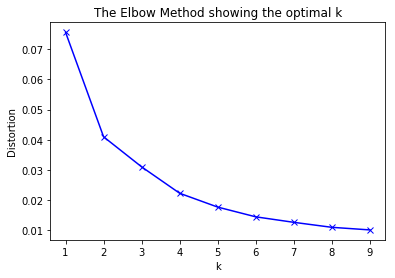

In [441]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy10)
    kmeanModel.fit(hierarchy10)
    distortions.append(sum(np.min(cdist(hierarchy10, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy10.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [442]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy10)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy10, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""
--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.9536883218365044
For n_clusters=3, The Silhouette Coefficient is 0.9055975843553611
For n_clusters=4, The Silhouette Coefficient is 0.7000378575276186
For n_clusters=5, The Silhouette Coefficient is 0.6982522162667526
For n_clusters=6, The Silhouette Coefficient is 0.6954219611969468
For n_clusters=7, The Silhouette Coefficient is 0.6334627063237654
For n_clusters=8, The Silhouette Coefficient is 0.6261900329940658
For n_clusters=9, The Silhouette Coefficient is 0.5957724185602594
For n_clusters=10, The Silhouette Coefficient is 0.5968445803972106
""")


--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.9536883218365044
For n_clusters=3, The Silhouette Coefficient is 0.9055975843553611
For n_clusters=4, The Silhouette Coefficient is 0.7000378575276186
For n_clusters=5, The Silhouette Coefficient is 0.6982522162667526
For n_clusters=6, The Silhouette Coefficient is 0.6954219611969468
For n_clusters=7, The Silhouette Coefficient is 0.6334627063237654
For n_clusters=8, The Silhouette Coefficient is 0.6261900329940658
For n_clusters=9, The Silhouette Coefficient is 0.5957724185602594
For n_clusters=10, The Silhouette Coefficient is 0.5968445803972106




Text(0.5, 1.0, '2D K-means Result')

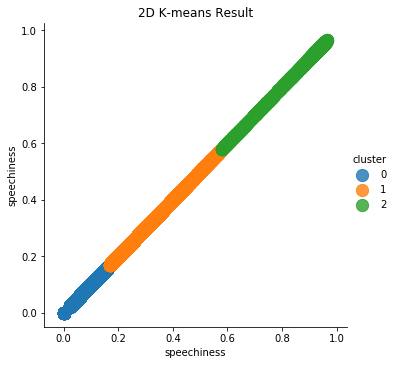

In [526]:
hierarchy10 = songs_1[['speechiness']]

# Fit the model.
model = KMeans(n_clusters=3, random_state=0).fit(hierarchy10)

# Get results.
hierarchy10['cluster'] = model.predict(hierarchy10)

# 결과값 살펴보기
hierarchy10['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('speechiness','speechiness',data = hierarchy10, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

In [448]:
# # # 나타난 특성에 따라서 실제 곡들 살펴보기
hierarchy10=pd.concat([songs[['track_name','artist_name','url']], hierarchy10], axis=1)
hierarchy10df = pd.DataFrame(hierarchy10)

In [452]:
# 각 군집의 갯수 
print(len(hierarchy10df.loc[(hierarchy10df['cluster']==0), :]))
print(len(hierarchy10df.loc[(hierarchy10df['cluster']==1), :]))
print(len(hierarchy10df.loc[(hierarchy10df['cluster']==2), :]))
# 군집별 가장 최고값들의 10개 값 살펴보기
hierarchy10df0 = hierarchy10df.loc[(hierarchy10df['cluster']==0), :].sort_values(by='speechiness',ascending=False).head(10)
hierarchy10df1 = hierarchy10df.loc[(hierarchy10df['cluster']==1), :].sort_values(by='speechiness',ascending=False).head(10)
hierarchy10df2 = hierarchy10df.loc[(hierarchy10df['cluster']==2), :].sort_values(by='speechiness',ascending=False).head(10)

# hierarchy10df00 = hierarchy10df.loc[(hierarchy10df['cluster']==0)&(hierarchy10df['instrumentalness']==0.0), :].head(10)

hierarchy10df2

144299
23093
1907


,track_name,artist_name,url,speechiness,cluster
6092,Surfing Lesson - Live,Bill Engvall,https://open.spotify.com/track/5IQPK1cSTNuevfY...,0.965,2
37228,Here's Your Sign - Remastered,"Jeff Foxworthy, Bill Engvall, Ron White & Larr...",https://open.spotify.com/track/5z4CqHuPqdJSfT8...,0.965,2
118482,Why Would You Tell Me That?,Hannibal Buress,https://open.spotify.com/track/7JsL5411N8uzsPm...,0.965,2
145263,Parents Still Don't Understand (Interlude),Lil Dicky,https://open.spotify.com/track/3VH6OsFMRUBWsLO...,0.965,2
46550,Piss Drinkers,Patton Oswalt,https://open.spotify.com/track/4lrltxOQboT2uzX...,0.963,2
96383,Sheets,Aziz Ansari,https://open.spotify.com/track/2jdxurfHt6AEm0T...,0.962,2
59895,Open Water,Ralphie May,https://open.spotify.com/track/0YCpg6u2eo2FmIs...,0.962,2
16006,Why We Don't Need 10 Commandments,George Carlin,https://open.spotify.com/track/65GTYLKGNGje8B9...,0.962,2
4725,My Wife's Family,Jeff Foxworthy,https://open.spotify.com/track/2EWQIgbLgvl0aYe...,0.962,2
82575,Dead Parents Helping,George Carlin,https://open.spotify.com/track/7faSC0MzWPlND59...,0.962,2


In [450]:
print("------------------군집 0의 곡들-----------------")
for i in hierarchy10df0['url']:
    print(i)
    
print("------------------군집 1의 곡들-----------------")
for i in hierarchy10df1['url']:
    print(i)
    
print("------------------군집 2의 곡들-----------------")
for i in hierarchy10df2['url']:
    print(i)

# print("------------------값이 0.0 의 곡들-----------------")
# for i in hierarchy10df00['url']:
#     print(i)

------------------군집 0의 곡들-----------------
https://open.spotify.com/track/610z0pLxaQtCsmOYi5kJ9G
https://open.spotify.com/track/2OsB5mygafbQxTwznXC0eP
https://open.spotify.com/track/7qAvRM8ps4iECRsLLDs0G7
https://open.spotify.com/track/3XRQT7EoS4U87rUuJwg5P3
https://open.spotify.com/track/377BuyNXdfiCdZ9vERonxp
https://open.spotify.com/track/2Rjw8Egb06Yiy0y3GQMWOS
https://open.spotify.com/track/5ytmV00jr7di9K0O10dkBO
https://open.spotify.com/track/3pLzBdp8UXo0Vv4fBH42Ok
https://open.spotify.com/track/3g3TgkU0SWm0Ss62QVGfnk
https://open.spotify.com/track/7Kux9Q1ZYx1V1j3wre0aWk
------------------군집 1의 곡들-----------------
https://open.spotify.com/track/1ENK9lxO1pNLL70e06n2bH
https://open.spotify.com/track/10OgOQ9GSVNwcZliWFPfhd
https://open.spotify.com/track/2FIoph70SOhRNuhTaiJrKp
https://open.spotify.com/track/6Ad7FyAxc42mYQImkX5QgI
https://open.spotify.com/track/3lOVldpv6shpWDfsypnHDv
https://open.spotify.com/track/18LlW0ywSUa5dryIcpx9dw
https://open.spotify.com/track/7jaEKEhbhLpEIBJ6F

## 해석

0 : 144299   
1 : 23093    
2 : 1907    
    
Child	Edward Sharpe & The Magnetic Zeros     https://open.spotify.com/track/610z0pLxaQtCsmOYi5kJ9G  0.17   0
Shredded Metal	Ninja Sex Party	https://open.spotify.com/track/1ENK9lxO1pNLL70e06n2bH   0.578   1
Surfing Lesson - Live	Bill Engvall	https://open.spotify.com/track/5IQPK1cSTNuevfYsJwcQbr  0.965   2   

Speechiness는 트랙에서 말한 단어의 존재를 감지합니다.    
독점적으로 말하기와 같은 녹음 (예 : 토크쇼, 오디오 북,시)은 1.0에 가까워집니다.    
0.66 이상의 값은 전적으로 음성 단어로 만들어진 트랙을 나타냅니다.     
0.33에서 0.66 사이의 값은 랩 음악과 같은 경우를 포함하여 섹션 또는 계층으로 음악과 음성을 모두 포함 할 수 있는 트랙을 나타냅니다.   
0.33 미만의 값은 음악 및 기타 비언어적 트랙을 나타낼 가능성이 가장 높습니다.    
   
0번군집은 트랙에 말하기가 없을 가능성이 높습니다. 보통의 팝음악이거나 인스트루먼트 종류가 해당됩니다.  
1번군집은 트랙에 말하기가 보통정도 포함되고 랩트랙이 포함될 가능성이 높습니다.    
2번군집은 완전한 말하기 트랙일 가능성이 높습니다.      

In [527]:
# 데이터 삽입
songs['clst_speechiness'] = hierarchy10['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,clst_popularity,clst_loudness,clst_tempo,clst_time_signature,clst_acousticness,clst_danceability,clst_energy,clst_instrumentalness,clst_liveness,clst_speechiness
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,2,1,0,0,0,1,2,0,0,0
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,2,1,0,0,0,1,2,0,0,0
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,2,1,0,0,0,2,1,0,0,0
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,2,1,0,0,0,2,2,0,0,1
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,2,1,2,0,0,1,1,0,0,0


## >>>>> 11 audio_valence
높은 원자가를 가진 트랙은 긍정적 (예 : 행복, 쾌활, 행복),    
낮은 원자가의 트랙은 더 부정적 (예 : 슬프고 우울, 분노)

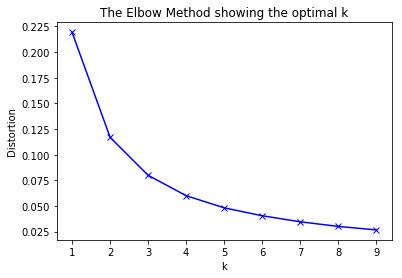

In [453]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy11)
    kmeanModel.fit(hierarchy11)
    distortions.append(sum(np.min(cdist(hierarchy11, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy11.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [454]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy11)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy11, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""
--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.5998756091612572
For n_clusters=3, The Silhouette Coefficient is 0.5657108996263202
For n_clusters=4, The Silhouette Coefficient is 0.5505145892187246
For n_clusters=5, The Silhouette Coefficient is 0.5479664165245922
For n_clusters=6, The Silhouette Coefficient is 0.5391770085006381
For n_clusters=7, The Silhouette Coefficient is 0.5397842932229925
For n_clusters=8, The Silhouette Coefficient is 0.5392455264917894
For n_clusters=9, The Silhouette Coefficient is 0.535083430815819
For n_clusters=10, The Silhouette Coefficient is 0.5334898447054474
""")


--------------------------2만개 data 결과----------------------
For n_clusters=2, The Silhouette Coefficient is 0.5998756091612572
For n_clusters=3, The Silhouette Coefficient is 0.5657108996263202
For n_clusters=4, The Silhouette Coefficient is 0.5505145892187246
For n_clusters=5, The Silhouette Coefficient is 0.5479664165245922
For n_clusters=6, The Silhouette Coefficient is 0.5391770085006381
For n_clusters=7, The Silhouette Coefficient is 0.5397842932229925
For n_clusters=8, The Silhouette Coefficient is 0.5392455264917894
For n_clusters=9, The Silhouette Coefficient is 0.535083430815819
For n_clusters=10, The Silhouette Coefficient is 0.5334898447054474



Text(0.5, 1.0, '2D K-means Result')

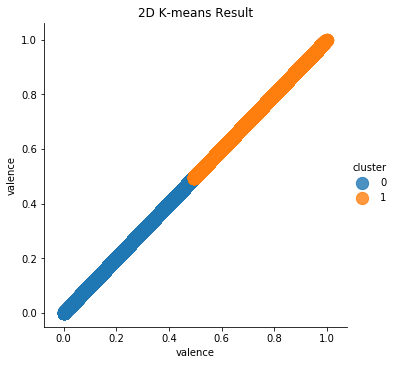

In [529]:
hierarchy11 = songs_1[['valence']]

# Fit the model.
model = KMeans(n_clusters=2, random_state=0).fit(hierarchy11)

# Get results.
hierarchy11['cluster'] = model.predict(hierarchy11)

# 결과값 살펴보기
hierarchy11['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('valence','valence',data = hierarchy11, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

In [457]:
# # # 나타난 특성에 따라서 실제 곡들 살펴보기
hierarchy11=pd.concat([songs[['track_name','artist_name','url']], hierarchy11], axis=1)
hierarchy11df = pd.DataFrame(hierarchy11)

In [467]:
# 각 군집의 갯수 
print(len(hierarchy11df.loc[(hierarchy11df['cluster']==0), :]))
print(len(hierarchy11df.loc[(hierarchy11df['cluster']==1), :]))

# 군집별 가장 최고값들의 10개 값 살펴보기
hierarchy11df0 = hierarchy11df.loc[(hierarchy11df['cluster']==0)&(hierarchy11df['valence'] < 0.2), :].sort_values(by='valence',ascending=False).head(10)
hierarchy11df1 = hierarchy11df.loc[(hierarchy11df['cluster']==1), :].sort_values(by='valence',ascending=False).head(10)

# hierarchy11df00 = hierarchy11df.loc[(hierarchy11df['cluster']==0)&(hierarchy11df['instrumentalness']==0.0), :].head(10)

hierarchy11df1

89009
80290


,track_name,artist_name,url,valence,cluster
48345,Electric Zoo,Spongebob Squarepants,https://open.spotify.com/track/56KyV36puztkiJ6...,1.000,1
97640,Alegre Y Mujeriego,El As De La Sierra,https://open.spotify.com/track/6i6X6R7FglHpmFU...,1.000,1
13158,Alegre Y Mujeriego,Video Rola,https://open.spotify.com/track/5BJNaGuYbOLT5Ir...,1.000,1
4432,Nancy Dawson,Jerry Bryant,https://open.spotify.com/track/1BNKmLMRhBARHJh...,0.999,1
11215,La Pava,Montez de Durango,https://open.spotify.com/track/6WQ8xC0djPL1nRR...,0.999,1
1934,Barney Theme Song,Barney,https://open.spotify.com/track/4Zp7iCDJU2BfD7S...,0.998,1
81544,Escuela De Rancho,Banda Sinaloense MS de Sergio Lizárraga,https://open.spotify.com/track/5EYuBSplxmQQytL...,0.997,1
92187,La Suata,La Arrolladora Banda El Limón De Rene Camacho,https://open.spotify.com/track/0smVSDT780Zloqg...,0.995,1
44602,La Suata - Vers. Censurada,La Arrolladora Banda El Limón De Rene Camacho,https://open.spotify.com/track/1zVa9zMCLtaZYLo...,0.995,1
90996,C-1,Banda Sinaloense MS de Sergio Lizárraga,https://open.spotify.com/track/4QlsJhb8vqR4Dno...,0.995,1


In [466]:
print("------------------군집 0의 곡들-----------------")
for i in hierarchy11df0['url']:
    print(i)
    
print("------------------군집 1의 곡들-----------------")
for i in hierarchy11df1['url']:
    print(i)
    

------------------군집 0의 곡들-----------------
https://open.spotify.com/track/1XE1UGRpvvkaFEeqe1OJpw
https://open.spotify.com/track/4r16M8BzgI45VgpePvXYbV
https://open.spotify.com/track/4cCRXLBSqUZdO8PMke7uLG
https://open.spotify.com/track/5CtKdgmm86gjAETNUqDJHQ
https://open.spotify.com/track/3OszIXRrABV5f6F9JOGK3o
https://open.spotify.com/track/42mW8YfRXATwhNDBBv0UqH
https://open.spotify.com/track/3V1cnnJetqpABMBqbi9ZHB
https://open.spotify.com/track/5dTF0KW5lebJ7WuQyWGUPt
https://open.spotify.com/track/41isF5DR6sT9acqYDTQ7FS
https://open.spotify.com/track/4Iyo50UoYhuuYORMLrGDci
------------------군집 1의 곡들-----------------
https://open.spotify.com/track/56KyV36puztkiJ62ca3D1t
https://open.spotify.com/track/6i6X6R7FglHpmFUevGwj6m
https://open.spotify.com/track/5BJNaGuYbOLT5IrLGVY3vz
https://open.spotify.com/track/1BNKmLMRhBARHJhCcvfysq
https://open.spotify.com/track/6WQ8xC0djPL1nRRlu9hOiS
https://open.spotify.com/track/4Zp7iCDJU2BfD7SOLuSa6X
https://open.spotify.com/track/5EYuBSplxmQQytLDr

## 해석

0 : 89009    
1 : 80290    
    
Nancy Dawson	Jerry Bryant	https://open.spotify.com/track/1BNKmLMRhBARHJhCcvfysq	0.999	1    
  
트랙에 의해 전달되는 음악적 양립성을 나타내는 0.0에서 1.0까지의 측정 값입니다.    
높은 원자가를 가진 트랙은 긍정적 (예 : 행복, 쾌활),      
낮은 원자가의 트랙은 더 부정적 (예 : 슬프고 우울, 분노)합니다.     
    
Don't Wanna Try	Frankie J	https://open.spotify.com/track/1XE1UGRpvvkaFEeqe1OJpw	0.199	0     
Escuela De Rancho	Banda Sinaloense MS de Sergio Lizárraga	https://open.spotify.com/track/5EYuBSplxmQQytLDrQIxlY	0.997	1    


0번군집은 슬프고 우울 분노 분위기의 곡입니다.        
1번군집은 행복 쾌활    분위기의 곡입니다.   

In [530]:
# 데이터 삽입
songs['clst_valence'] = hierarchy11['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,clst_loudness,clst_tempo,clst_time_signature,clst_acousticness,clst_danceability,clst_energy,clst_instrumentalness,clst_liveness,clst_speechiness,clst_valence
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,1,0,0,0,1,2,0,0,0,0
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,1,0,0,0,1,2,0,0,0,1
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,1,0,0,0,2,1,0,0,0,1
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,1,0,0,0,2,2,0,0,1,1
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,1,2,0,0,1,1,0,0,0,0


## >>>>> 12 KEY
곡의 키를 나타내줌 . 범주형

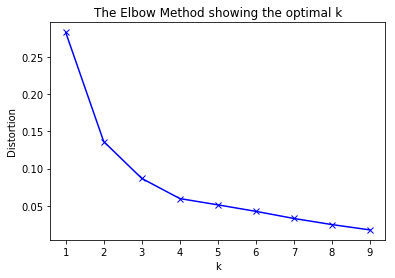

In [468]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hierarchy12)
    kmeanModel.fit(hierarchy12)
    distortions.append(sum(np.min(cdist(hierarchy12, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / hierarchy12.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [469]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(hierarchy12)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(hierarchy12, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
print("""

""")

Text(0.5, 1.0, '2D K-means Result')

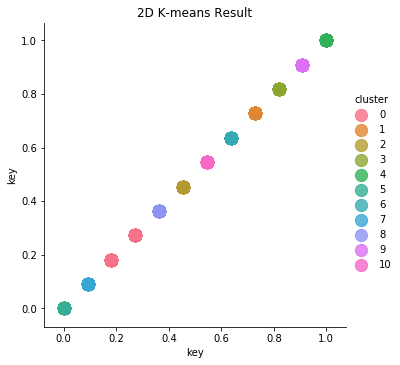

In [531]:
hierarchy11 = songs_1[['key']]

# Fit the model.
model = KMeans(n_clusters=11,random_state=0).fit(hierarchy12)

# Get results.
hierarchy12['cluster'] = model.predict(hierarchy12)

# 결과값 살펴보기
hierarchy12['cluster'].unique()

# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('key','key',data = hierarchy12, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('2D K-means Result')

## 해석

곡의 키 이며 11개의 값을 갖는다.

In [532]:
# 데이터 삽입
songs['clst_key'] = hierarchy12['cluster']
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,clst_tempo,clst_time_signature,clst_acousticness,clst_danceability,clst_energy,clst_instrumentalness,clst_liveness,clst_speechiness,clst_valence,clst_key
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,0,0,0,1,2,0,0,0,0,0
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,0,0,0,1,2,0,0,0,1,4
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,0,0,0,2,1,0,0,0,1,2
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,0,0,0,2,2,0,0,1,1,8
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,2,0,0,1,1,0,0,0,0,4


# >>>>>>>>>>>>>> 전체 데이터 저장

In [533]:
songs.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,clst_tempo,clst_time_signature,clst_acousticness,clst_danceability,clst_energy,clst_instrumentalness,clst_liveness,clst_speechiness,clst_valence,clst_key
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,0,0,0,1,2,0,0,0,0,0
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,0,0,0,1,2,0,0,0,1,4
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,0,0,0,2,1,0,0,0,1,2
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,0,0,0,2,2,0,0,1,1,8
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,2,0,0,1,1,0,0,0,0,4


In [28]:
# songs.to_csv('./data/20190304_clust_spotify_allsong.csv')

In [34]:
clust_song = pd.read_csv('./data/20190304_clust_spotify_allsong.csv')
del clust_song['Unnamed: 0']
clust_song

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,clst_tempo,clst_time_signature,clst_acousticness,clst_danceability,clst_energy,clst_instrumentalness,clst_liveness,clst_speechiness,clst_valence,clst_key
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.010300,0.542,216933,...,0,0,0,1,2,0,0,0,0,0
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.006640,0.545,233933,...,0,0,0,1,2,0,0,0,1,4
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.033900,0.950,284200,...,0,0,0,2,1,0,0,0,1,2
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.142000,0.843,270507,...,0,0,0,2,2,0,0,1,1,8
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.002390,0.429,266773,...,2,0,0,1,1,0,0,0,0,4
5,*NSYNC,Bye Bye Bye,62bOmKYxYg7dhrC6gH9vFn,72,https://open.spotify.com/track/62bOmKYxYg7dhrC...,https://i.scdn.co/image/b8c18208ed80713b9a3aff...,2000-03-21,0.031000,0.610,200400,...,2,0,0,1,2,0,0,0,1,1
6,Nelly,Ride Wit Me,06iMqWThw4w8fTFyccvOwr,73,https://open.spotify.com/track/06iMqWThw4w8fTF...,https://i.scdn.co/image/85bec1a0b3b231d9a2162f...,2000-06-27,0.066800,0.854,291782,...,0,0,0,2,1,0,0,0,1,6
7,Britney Spears,Oops!...I Did It Again,6naxalmIoLFWR0siv8dnQQ,76,https://open.spotify.com/track/6naxalmIoLFWR0s...,https://i.scdn.co/image/9e037d40a46ccc30791f74...,2000-05-15,0.300000,0.751,211160,...,0,0,1,2,2,0,0,0,1,7
8,The Beatles,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,77,https://open.spotify.com/track/0aym2LBJBk9DAYu...,https://i.scdn.co/image/f8f5aca53b7b2dd79655b5...,2000-11-13,0.011200,0.386,425653,...,1,0,0,0,1,0,0,0,1,9
9,Shaggy,It Wasn't Me,1Bt6TZfF8FSqdiHPN0vy4u,68,https://open.spotify.com/track/1Bt6TZfF8FSqdiH...,https://i.scdn.co/image/c189556ce933a7e289a7a1...,2000-08-08,0.045000,0.852,227600,...,0,0,0,2,1,0,0,0,1,5


In [35]:
clust_song.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'url', 'images',
       'date', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'clst_popularity',
       'clst_loudness', 'clst_tempo', 'clst_time_signature',
       'clst_acousticness', 'clst_danceability', 'clst_energy',
       'clst_instrumentalness', 'clst_liveness', 'clst_speechiness',
       'clst_valence', 'clst_key'],
      dtype='object')

In [36]:
clust_song['clst_category'] = \
clust_song['clst_loudness'].astype("str") + \
clust_song['clst_tempo'].astype("str") + \
clust_song['clst_acousticness'].astype("str") + \
clust_song['clst_speechiness'].astype("str") +  \
clust_song['clst_instrumentalness'].astype("str") + \
clust_song['clst_danceability'].astype("str") + \
clust_song['clst_valence'].astype("str") 
clust_song.head()

,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,duration_ms,...,clst_time_signature,clst_acousticness,clst_danceability,clst_energy,clst_instrumentalness,clst_liveness,clst_speechiness,clst_valence,clst_key,clst_category
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,https://i.scdn.co/image/66ff51342a9b250bf5b998...,2000-10-24,0.01030,0.542,216933,...,0,0,1,2,0,0,0,0,0,1000010
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZ...,https://i.scdn.co/image/ea1bb526f0b9d2a3375427...,2000,0.00664,0.545,233933,...,0,0,1,2,0,0,0,1,4,1000011
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM...,https://i.scdn.co/image/135ffbfeb47d564df36fdb...,2000-05-23,0.03390,0.950,284200,...,0,0,2,1,0,0,0,1,2,1000021
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfH...,https://i.scdn.co/image/48787c279dab6e8c1cc3b4...,2000-10-31,0.14200,0.843,270507,...,0,0,2,2,0,0,1,1,8,1001021
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://i.scdn.co/image/495b0549379fc4c324445f...,2000-07-10,0.00239,0.429,266773,...,0,0,1,1,0,0,0,0,4,1200010


In [39]:
len(clust_song['clst_category'].unique())

713

In [40]:
# clust_song.to_csv('./data/20190305_clust_spotify_allsong_ver2.csv')

## 군집화 방식을 여러가지로 시도해보기
< 변수가 될만한 것 >
1. 표준화 여부
DURATION 칼럼의 경우 값이 너무 크게 나오므로 이 값에 따라 군집이 좌지우지 될 가능성이 높다.
군집화에 있어서 표준화를 시키는 것이 어떻게 영향을 미치는지 실행해 보자.

2. 계층적으로 군집화
계층적으로 군집화를 진행할때 가장 큰 분류를 먼저 하는 것 부터 작은 요소들을 분류하는 것으로 생각해 보아야 할 것 같다.

>MBTI 방식의 분류 방법을 적용 칼럼별 분류를 적용




